# Imports

In [299]:
from io import StringIO
import math
import json
import os
import glob
import re

import pandas as pd
import seaborn as sns
import screed
from tqdm import tqdm
 
%matplotlib inline

# Get `leaftea translate` ressults

In [29]:
ls -lha /mnt/ibm_sm/home/olga/pipeline-results/human-simulated/nf-predictorthologs--run/

total 20K
drwxr-xr-x  9 olga czb 4.0K Aug 30 21:46 ./
drwxr-xr-x  9 olga czb 4.0K Sep 22 18:44 ../
drwxr-xr-x  2 olga czb 8.0K Sep 15 12:02 blastp/
drwxr-xr-x  2 olga czb 4.0K Sep  4 20:05 infernal/
drwxr-xr-x  2 olga czb 4.0K Sep 15 12:00 MultiQC/
drwxr-xr-x  2 olga czb 4.0K Aug 28 09:20 ncbi_refseq/
drwxr-xr-x  2 olga czb 4.0K Sep 15 11:58 pipeline_info/
drwxr-xr-x  2 olga czb 8.0K Sep 15 11:51 sencha/
drwxr-xr-x 48 olga czb 4.0K Sep 15 12:00 translate/


In [30]:
ls -lha /mnt/ibm_sm/home/olga/pipeline-results/human-simulated/nf-predictorthologs--run/translate

total 24K
drwxr-xr-x 48 olga czb 4.0K Sep 15 12:00 ./
drwxr-xr-x  9 olga czb 4.0K Aug 30 21:46 ../
drwxr-xr-x  2 olga czb 4.0K Aug 28 09:43 molecule-dayhoff_ksize-10/
drwxr-xr-x  2 olga czb 4.0K Aug 28 09:40 molecule-dayhoff_ksize-11/
drwxr-xr-x  2 olga czb 4.0K Aug 28 09:40 molecule-dayhoff_ksize-12/
drwxr-xr-x  2 olga czb 4.0K Aug 28 09:40 molecule-dayhoff_ksize-13/
drwxr-xr-x  2 olga czb 4.0K Aug 28 09:43 molecule-dayhoff_ksize-14/
drwxr-xr-x  2 olga czb 4.0K Aug 28 09:44 molecule-dayhoff_ksize-15/
drwxr-xr-x  2 olga czb 4.0K Aug 28 09:40 molecule-dayhoff_ksize-16/
drwxr-xr-x  2 olga czb 4.0K Aug 28 09:39 molecule-dayhoff_ksize-17/
drwxr-xr-x  2 olga czb 4.0K Aug 28 09:39 molecule-dayhoff_ksize-18/
drwxr-xr-x  2 olga czb 4.0K Aug 28 09:44 molecule-dayhoff_ksize-19/
drwxr-xr-x  2 olga czb 4.0K Aug 28 09:40 molecule-dayhoff_ksize-20/
drwxr-xr-x  2 olga czb 4.0K Aug 28 09:40 molecule-dayhoff_ksize-21/
drwxr-xr-x  2 olga czb 4.0K Sep 15 11:54 molecule-dayhoff_ksize-22/
drwxr-xr-x  2 olg

In [31]:
ls -lha /mnt/ibm_sm/home/olga/pipeline-results/human-simulated/nf-predictorthologs--run/translate/molecule-protein_ksize-15/

total 1.4G
drwxr-xr-x  2 olga czb 4.0K Aug 28 09:31 ./
drwxr-xr-x 48 olga czb 4.0K Sep 15 12:00 ../
-rw-r--r--  1 olga czb 130M Aug 28 09:31 Homo_sapiens_9606_qfo_dna_01__molecule-protein_ksize-15__coding_reads_nucleotides.fasta
-rw-r--r--  1 olga czb  78M Aug 28 09:31 Homo_sapiens_9606_qfo_dna_01__molecule-protein_ksize-15__coding_reads_peptides.fasta
-rw-r--r--  1 olga czb 810M Aug 28 09:31 Homo_sapiens_9606_qfo_dna_01__molecule-protein_ksize-15__coding_scores.csv
-rw-r--r--  1 olga czb 1.5K Aug 28 09:31 Homo_sapiens_9606_qfo_dna_01__molecule-protein_ksize-15__coding_summary.json
-rw-r--r--  1 olga czb 370M Aug 28 09:31 Homo_sapiens_9606_qfo_dna_01__molecule-protein_ksize-15__noncoding_reads_nucleotides.fasta


In [32]:
!head -n 10 /mnt/ibm_sm/home/olga/pipeline-results/human-simulated/nf-predictorthologs--run/translate/molecule-protein_ksize-15/*_coding_reads*fasta

==> /mnt/ibm_sm/home/olga/pipeline-results/human-simulated/nf-predictorthologs--run/translate/molecule-protein_ksize-15/Homo_sapiens_9606_qfo_dna_01__molecule-protein_ksize-15__coding_reads_nucleotides.fasta <==
>read1/tr|A0A024R1R8|ENSP00000491117;mate1Start:1;mate2Start:1 translation_frame: 1 jaccard: 1.0
ATGTCCAGCCACGAAGGTGGCAAGAAGAAGGCACTGAAACAGCCCAAGAAGCAGGCCAAGGAGATGGACGAGGAAGAGAAGGCTTTCAAGCAGAAACAAAAAGAGGAGCAGAAGAAACTCGAGGTGCTAAAAGCGAAGGTCGTGGGGAAG
>read2/tr|A0A024R1R8|ENSP00000491117;mate1Start:1;mate2Start:1 translation_frame: 1 jaccard: 0.9722222222222222
ATTTCCAGCCACGAAGGTGGCAAGAAGAAGGCACTGAAACAGCCCAAGAAGCAGGCCAAGGAGATGGACGAGGAAGAGAAGGCTTTCAAGCAGAAACAAAAAGAGGAGCAGAAGAAACTCGAGGTGCTAAAAGCGAAGGTCGTGGGGAAG
>read6/tr|A0A024R1R8|ENSP00000491117;mate1Start:1;mate2Start:1 translation_frame: 1 jaccard: 1.0
ATGTCCAGCCACGAAGGTGGCAAGAAGAAGGCACTGAAACAGCCCAAGAAGCAGGCCAAGGAGATGGACGAGGAAGAGAAGGCNTTCAAGCAGAAACAAAAAGAGGAGCAGAAGAAACTCGAGGTGCTAAAAGCGAAGGTCGTGGGGAAG
>read7/tr|A0A024R1R8|ENSP0000

## Read `leaftea` JSON metadata

### jq transform to see contents

In [33]:
! jq . /mnt/ibm_sm/home/olga/pipeline-results/human-simulated/nf-predictorthologs--run/translate/molecule-protein_ksize-15/Homo_sapiens_9606_qfo_dna_01__molecule-protein_ksize-15__coding_summary.json

{
  "input_files": [
    "Homo_sapiens_9606_qfo_dna_01.fq.gz"
  ],
  "jaccard_info": {
    "count": 2056774,
    "mean": 0.388295798026765,
    "std": 0.4422436270898122,
    "min": 0,
    "25%": 0,
    "50%": 0,
    "75%": 1,
    "max": 1
  },
  "categorization_counts": {
    "Translation is shorter than peptide k-mer size + 1": 1225,
    "Translation frame has stop codon(s)": 19360,
    "Coding": 538372,
    "Non-coding": 456018,
    "Low complexity nucleotide": 0,
    "Read length was shorter than 3 * peptide k-mer size": 0,
    "Low complexity peptide in protein20 alphabet": 26
  },
  "categorization_percentages": {
    "Translation is shorter than peptide k-mer size + 1": 0.12068953626646674,
    "Translation frame has stop codon(s)": 1.9073872833622825,
    "Coding": 53.04152409702059,
    "Non-coding": 44.9278375095197,
    "Low complexity nucleotide": 0,
    "Read length was shorter than 3 * peptide k-mer size": 0,
    "Low complexity peptide in protein20 alphabet": 0.002561573

## Iterate over json summary and read them in

In [21]:
translate_dir = '/mnt/ibm_sm/home/olga/pipeline-results/human-simulated/nf-predictorthologs--run/translate'

categorization_dict = {}
n_reads_per_frame_dict = {}
for filename in tqdm(glob.glob(f'{translate_dir}/*/*.json')):
    with open(filename) as f:
        data = json.load(f)
        
    basename = os.path.basename(filename)
    sketch_id = basename.split('__')[1]
    split = sketch_id.split('_')
    alphabet = split[0].split('-')[1]
    ksize = int(split[1].split('-')[1])
    
    cat = data['categorization_percentages']
    cat_new = {}
    for key, value in cat.items():
        if 'complexity peptide' in key:
            new_key = key.split('in')[0].strip()
        else:
            new_key = key
        cat_new[new_key] = value
        
    
    categorization_dict[(alphabet, ksize)] = cat_new
    n_reads_per_frame_dict[(alphabet, ksize)] = data['histogram_n_coding_frames_per_read']

n_frames_per_read = pd.DataFrame(n_reads_per_frame_dict).T.sort_index()
n_frames_per_read = n_frames_per_read.fillna(0)
n_frames_per_read.head()

100%|██████████| 46/46 [00:00<00:00, 711.24it/s]


Number of reads with 1 putative protein-coding translations  \
dayhoff 9                                            557044.0             
        10                                           643703.0             
        11                                           630387.0             
        12                                           620349.0             
        13                                           617005.0             

            Number of reads with 2 putative protein-coding translations  \
dayhoff 9                                            189392.0             
        10                                            60263.0             
        11                                            11857.0             
        12                                             4087.0             
        13                                             1857.0             

            Number of reads with 3 putative protein-coding translations  \
dayhoff 9                                             59919.0             
        10                                            10529.0             
        11                                             1697.0             
        12                                              341.0             
        13                                              169.0             

            Number of reads with 4 putative protein-coding translations  \
dayhoff 9                                             14828.0             
        10                                             1273.0             
        11                                               64.0             
        12                                               11.0             
        13                                                4.0             

            Number of reads with 5 putative protein-coding translations  \
dayhoff 9                                              2316.0             
        10                                               84.0             
        11                                                0.0             
        12                                                0.0             
        13                                                0.0             

            Number of reads with 6 putative protein-coding translations  
dayhoff 9                                               203.0            
        10                                                0.0            
        11                                                0.0            
        12                                                0.0            
        13                                                0.0

### Number frames per read

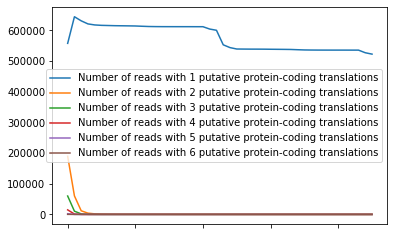

In [22]:
n_frames_per_read.plot()

In [23]:
n_frames_per_read_tidy = n_frames_per_read.stack().reset_index()
n_frames_per_read_tidy = n_frames_per_read_tidy.rename(
    columns={'level_0': 'alphabet', 'level_1': 'ksize', 
             'level_2': 'category', 0: 'n_reads'}
)
n_frames_per_read_tidy['n_frames'] = n_frames_per_read_tidy['category'].str.extract('(\d)').astype(int)
n_frames_per_read_tidy.head()

,alphabet,ksize,category,n_reads,n_frames
0,dayhoff,9,Number of reads with 1 putative protein-coding...,557044.0,1
1,dayhoff,9,Number of reads with 2 putative protein-coding...,189392.0,2
2,dayhoff,9,Number of reads with 3 putative protein-coding...,59919.0,3
3,dayhoff,9,Number of reads with 4 putative protein-coding...,14828.0,4
4,dayhoff,9,Number of reads with 5 putative protein-coding...,2316.0,5


#### Actually plot

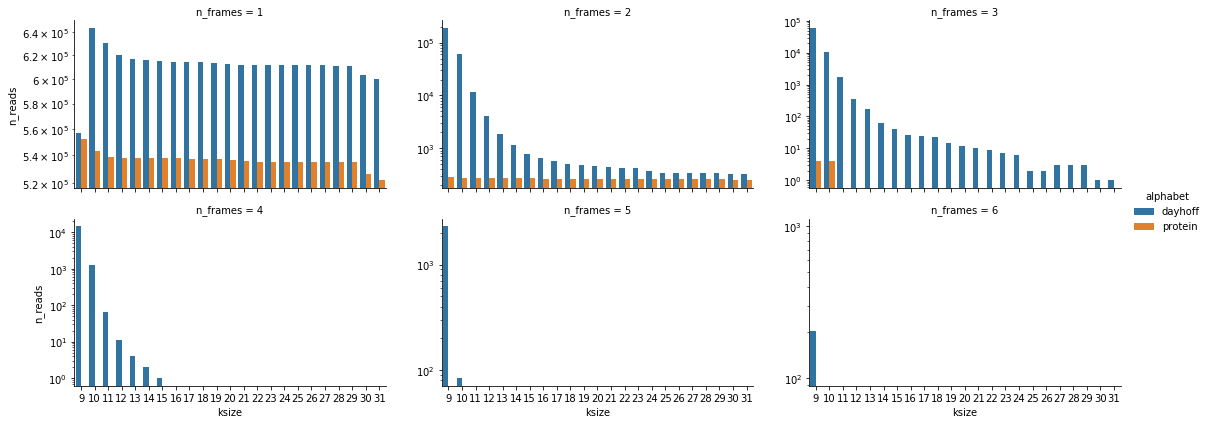

In [24]:
g = sns.catplot(
    x='ksize', y='n_reads', hue='alphabet', 
    col='n_frames', col_wrap=3, height=3, aspect=1.75,
    data=n_frames_per_read_tidy, kind='bar', sharey=False)
g.set(yscale='log')

In [25]:
n_frames_per_read_tidy.query(
    '(n_frames == 4) & (n_reads == 0) & (alphabet == "dayhoff")'
)

,alphabet,ksize,category,n_reads,n_frames
45,dayhoff,16,Number of reads with 4 putative protein-coding...,0.0,4
51,dayhoff,17,Number of reads with 4 putative protein-coding...,0.0,4
57,dayhoff,18,Number of reads with 4 putative protein-coding...,0.0,4
63,dayhoff,19,Number of reads with 4 putative protein-coding...,0.0,4
69,dayhoff,20,Number of reads with 4 putative protein-coding...,0.0,4
75,dayhoff,21,Number of reads with 4 putative protein-coding...,0.0,4
81,dayhoff,22,Number of reads with 4 putative protein-coding...,0.0,4
87,dayhoff,23,Number of reads with 4 putative protein-coding...,0.0,4
93,dayhoff,24,Number of reads with 4 putative protein-coding...,0.0,4
99,dayhoff,25,Number of reads with 4 putative protein-coding...,0.0,4


In [26]:
n_frames_per_read_tidy.query(
    '(n_frames == 3) & (n_reads == 0) & (alphabet == "dayhoff")'
)

,alphabet,ksize,category,n_reads,n_frames


In [27]:
n_frames_per_read_tidy.query(
    '(n_frames <= 3) & (n_reads > 0) & (alphabet == "protein")')

,alphabet,ksize,category,n_reads,n_frames
138,protein,9,Number of reads with 1 putative protein-coding...,552319.0,1
139,protein,9,Number of reads with 2 putative protein-coding...,289.0,2
140,protein,9,Number of reads with 3 putative protein-coding...,4.0,3
144,protein,10,Number of reads with 1 putative protein-coding...,543198.0,1
145,protein,10,Number of reads with 2 putative protein-coding...,270.0,2
146,protein,10,Number of reads with 3 putative protein-coding...,4.0,3
150,protein,11,Number of reads with 1 putative protein-coding...,538629.0,1
151,protein,11,Number of reads with 2 putative protein-coding...,270.0,2
156,protein,12,Number of reads with 1 putative protein-coding...,538413.0,1
157,protein,12,Number of reads with 2 putative protein-coding...,270.0,2


##### What is the equivalent of k=11 in proteins, for dayhoff?

In [20]:
11 * 

SyntaxError: invalid syntax (<ipython-input-20-c493d82954d7>, line 1)

In [ ]:
g = sns.catplot(
    x='ksize', y='n_reads', hue='alphabet', 
    col='n_frames', col_wrap=4, height=3, 
    data=n_frames_per_read_tidy, kind='point', sharey=False)
g.set(yscale='log')

In [137]:
11 * math.log(20) / math.log(6)

18.391450177903113

### Categorization

In [138]:
categorization = pd.DataFrame(categorization_dict).T.sort_index()
# categorization.columns = [for x in categorization.columns]
# categorization = categorization.groupby(axis=1, level=0).sum()
print(categorization.shape)

# remove categories that are 0 for all alphabets and ksizes
nonzero_for_all = (categorization > 0).any(axis=0)
print("Zero for all alpahbets and ksizes:", 
      categorization.columns[~nonzero_for_all])
categorization = categorization.loc[:, nonzero_for_all]
categorization = categorization.rename(columns={'Translation is shorter than peptide k-mer size + 1': 'Too few k-mers'})

print(categorization.shape)
categorization.head()

(46, 7)
Zero for all alpahbets and ksizes: Index(['Low complexity nucleotide', 'Read length was shorter than 3 * peptide k-mer size'], dtype='object')
(46, 5)


Coding  Low complexity peptide  Non-coding  \
dayhoff 9   81.152826                0.003350   16.886880   
        10  70.527221                0.003153   27.497805   
        11  63.448706                0.002857   34.571887   
        12  61.555407                0.002857   36.454545   
        13  60.988610                0.002759   37.007648   

            Translation frame has stop codon(s)  Too few k-mers  
dayhoff 9                              1.907387        0.049557  
        10                             1.907387        0.064433  
        11                             1.907387        0.069162  
        12                             1.907387        0.079803  
        13                             1.907387        0.093596

In [139]:
categorization_tidy = categorization.stack().reset_index()
categorization_tidy = categorization_tidy.rename(
    columns={'level_0': 'alphabet', 'level_1': 'ksize', 
             'level_2': 'category', 0: 'percentage'}
)

categorization_tidy.head()

,alphabet,ksize,category,percentage
0,dayhoff,9,Coding,81.152826
1,dayhoff,9,Low complexity peptide,0.003350
2,dayhoff,9,Non-coding,16.886880
3,dayhoff,9,Translation frame has stop codon(s),1.907387
4,dayhoff,9,Too few k-mers,0.049557


#### Plot it

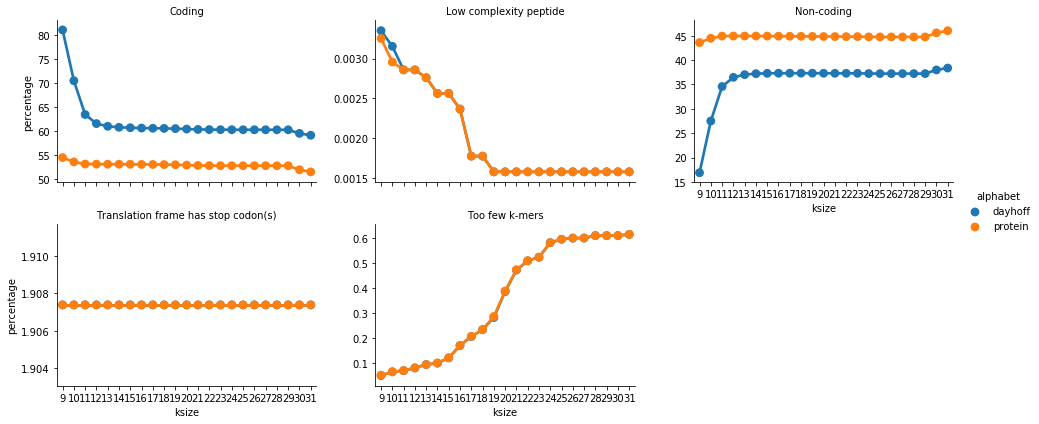

In [143]:
g = sns.catplot(
    x='ksize', y='percentage', hue='alphabet', 
    col='category', col_wrap=3, height=3, aspect=1.5,
    data=categorization_tidy, kind='point', sharey=False)
g.set_titles('{col_name}')

In [144]:
# categorization.columns = [x.split('in')[0].strip() if 'complexity peptide' in x else x for x in categorization.columns]
# categorization.groupby(ax)

In [145]:
blastp_results['read_id'].head().values

array(['read1/tr|A0A024R1R8|ENSP00000491117;mate1Start:1;mate2Start:1',
       'read1/tr|A0A024R1R8|ENSP00000491117;mate1Start:1;mate2Start:1',
       'read2/tr|A0A024R1R8|ENSP00000491117;mate1Start:1;mate2Start:1',
       'read2/tr|A0A024R1R8|ENSP00000491117;mate1Start:1;mate2Start:1',
       'read6/tr|A0A024R1R8|ENSP00000491117;mate1Start:1;mate2Start:1'],
      dtype=object)

In [ ]:
blastp_results

# Read DIAMOND blastp results

In [11]:
blastp_dir = '/mnt/ibm_sm/home/olga/pipeline-results/human-simulated/nf-predictorthologs--run/blastp'
! ls -lha $blastp_dir

total 5.5G
drwxr-xr-x 2 olga czb 4.0K Aug 28 09:54 .
drwxr-xr-x 9 olga czb 4.0K Aug 30 21:46 ..
-rw-r--r-- 1 olga czb 252M Aug 28 09:48 homo_sapiens_9606_qfo_dna_01__molecule-dayhoff_ksize-10__diamond__UP000005640_9606_db.tsv
-rw-r--r-- 1 olga czb 232M Aug 28 09:48 homo_sapiens_9606_qfo_dna_01__molecule-dayhoff_ksize-11__diamond__UP000005640_9606_db.tsv
-rw-r--r-- 1 olga czb 227M Aug 28 09:54 homo_sapiens_9606_qfo_dna_01__molecule-dayhoff_ksize-12__diamond__UP000005640_9606_db.tsv
-rw-r--r-- 1 olga czb 225M Aug 28 09:47 homo_sapiens_9606_qfo_dna_01__molecule-dayhoff_ksize-13__diamond__UP000005640_9606_db.tsv
-rw-r--r-- 1 olga czb 225M Aug 28 09:50 homo_sapiens_9606_qfo_dna_01__molecule-dayhoff_ksize-14__diamond__UP000005640_9606_db.tsv
-rw-r--r-- 1 olga czb 225M Aug 28 09:50 homo_sapiens_9606_qfo_dna_01__molecule-dayhoff_ksize-15__diamond__UP000005640_9606_db.tsv
-rw-r--r-- 1 olga czb 224M Aug 28 09:48 homo_sapiens_9606_qfo_dna_01__molecule-dayhoff_ksize-16__diamond__UP000005640_9606_d

In [179]:
%%time

DIAMOND_BLASTP_COLUMNS = ['read_id', 'subject_id', 'percent_identity', 'e_value', 'bitscore', 
           'subject_title', 'subject_taxid', 'subject_species', 'subject_kingdom', 
           'subject_superkingdom',
           'subject_phylum']

DIAMOND_PATTERN = '\d+.\d(.+)\[[\w ]+\]'

def read_diamond_blastp_output(filename):
    df = pd.read_csv(filename, sep='\t', names=DIAMOND_BLASTP_COLUMNS)
    basename = os.path.basename(filename)
    sketch_id = basename.split('__')[1]
    split = sketch_id.split('_')
    alphabet = split[0].split('-')[1]
    ksize = int(split[1].split('-')[1])
    df['alphabet'] = alphabet
    df['ksize'] = ksize
    df['read_uniprot_id'] = df['read_id'].str.extract('read\d+\/(?P<read_uniprot_id>[\w|]+);')
    df['read_uniprot_id_minimal'] = df['read_uniprot_id'].map(lambda x: '|'.join(x.split('|')[:2]) if isinstance(x, str) else x)

    df['subject_id_minimal'] = df['subject_id'].map(lambda x: '|'.join(x.split('|')[:2]))
    df['read_subject_uniprot_match'] = df['read_uniprot_id_minimal'] == blastp_results['subject_id_minimal']

#     df['refseq_id'] = df['subject_id']
#     df['description_with_predicted'] = df.subject_title.str.extract(DIAMOND_PATTERN)
#     df['is_predicted'] = df.subject_title.str.contains('PREDICTED')
#     df['description'] = df['description_with_predicted'].str.split('PREDICTED: ').str[-1]
    return df 
    
dfs = []
for filename in tqdm(glob.glob(f'{blastp_dir}/*')):
    df = read_diamond_blastp_output(filename)
    dfs.append(df)
blastp_results = pd.concat(dfs, ignore_index=True)
print(blastp_results.shape)
blastp_results.head()

100%|██████████| 46/46 [06:33<00:00,  8.56s/it]


(42185045, 13)
CPU times: user 4min 55s, sys: 3min 42s, total: 8min 37s
Wall time: 8min 47s


## Read test/train data

Build bloom filter on isoforms of proteins, but translate the actual proteins

In [207]:
ls -lha /mnt/ibm_sm/home/olga/pipeline-results/human-simulated

total 3.0K
drwxr-xr-x 6 olga czb 4.0K Sep 14 14:49 ./
drwxr-xr-x 4 olga czb 4.0K Aug 27 09:02 ../
drwxr-xr-x 8 olga czb 4.0K Sep 14 10:14 nf-predictorthologs--additional-isoforms/
drwxr-xr-x 3 olga czb 4.0K Sep 14 14:49 nf-predictorthologs--rnaseq/
drwxr-xr-x 9 olga czb 4.0K Aug 30 21:46 nf-predictorthologs--run/
drwxr-xr-x 9 olga czb 4.0K Sep 14 14:30 nf-predictorthologs--run--search-additional/


In [210]:
dfs = []
for filename in tqdm(glob.glob(f'/mnt/ibm_sm/home/olga/pipeline-results/human-simulated/nf-predictorthologs--additional-isoforms/blastp/*')):
    df = read_diamond_blastp_output(filename)
    dfs.append(df)
blastp_isoform_results = pd.concat(dfs, ignore_index=True)
print(blastp_isoform_results.shape)
blastp_isoform_results.head()

100%|██████████| 26/26 [01:13<00:00,  2.81s/it]


(27799014, 13)


,read_id,subject_id,percent_identity,e_value,bitscore,subject_title,subject_taxid,subject_species,subject_kingdom,subject_superkingdom,subject_phylum,alphabet,ksize
0,read51/sp|A0A024RBG1|ENSP00000492425;mate1:130...,sp|A0A024RBG1|NUD4B_HUMAN,100.0,4.900000e-24,108.2,sp|A0A024RBG1|NUD4B_HUMAN Diphosphoinositol po...,9606.0,Homo sapiens,Eukaryota,Chordata,NaN,protein,12
1,read51/sp|A0A024RBG1|ENSP00000492425;mate1:130...,sp|Q9NZJ9|NUDT4_HUMAN,100.0,4.900000e-24,108.2,sp|Q9NZJ9|NUDT4_HUMAN Diphosphoinositol polyph...,9606.0,Homo sapiens,Eukaryota,Chordata,NaN,protein,12
2,read51/sp|A0A024RBG1|ENSP00000492425;mate1:130...,tr|A0A0C4DGJ4|A0A0C4DGJ4_HUMAN,100.0,4.900000e-24,108.2,tr|A0A0C4DGJ4|A0A0C4DGJ4_HUMAN Isoform of Q9NZ...,NaN,NaN,NaN,NaN,NaN,protein,12
3,read52/sp|A0A024RBG1|ENSP00000492425;mate1:125...,sp|A0A024RBG1|NUD4B_HUMAN,100.0,2.100000e-22,102.8,sp|A0A024RBG1|NUD4B_HUMAN Diphosphoinositol po...,9606.0,Homo sapiens,Eukaryota,Chordata,NaN,protein,12
4,read52/sp|A0A024RBG1|ENSP00000492425;mate1:125...,sp|Q9NZJ9-2|NUDT4-2_HUMAN,100.0,2.100000e-22,102.8,"sp|Q9NZJ9-2|NUDT4-2_HUMAN Isoform of Q9NZJ9, I...",9606.0,Homo sapiens,Eukaryota,Chordata,NaN,protein,12


## Extract uniprot id from read

Regex: https://regex101.com/r/3scVin/1

In [180]:
%%time
blastp_results['read_uniprot_id'] = blastp_results['read_id'].str.extract('read\d+\/(?P<read_uniprot_id>[\w|]+);')
blastp_results['read_uniprot_id_minimal'] = blastp_results['read_uniprot_id'].map(lambda x: '|'.join(x.split('|')[:2]) if isinstance(x, str) else x)
print(blastp_results.shape)
blastp_results.head()

(42185045, 15)
CPU times: user 5min 13s, sys: 43 s, total: 5min 56s
Wall time: 5min 56s


In [181]:
blastp_results.sample(10)

,read_id,subject_id,percent_identity,e_value,bitscore,subject_title,subject_taxid,subject_species,subject_kingdom,subject_superkingdom,subject_phylum,alphabet,ksize,read_uniprot_id,read_uniprot_id_minimal
37076449,read639926/sp|Q8N7L0|ENSP00000445786;mate1:85-...,sp|Q8N7L0|F216B_HUMAN,100.0,8.300000e-23,102.4,sp|Q8N7L0|F216B_HUMAN Protein FAM216B OS=Homo ...,9606.0,Homo sapiens,Eukaryota,Chordata,NaN,dayhoff,12,sp|Q8N7L0|ENSP00000445786,sp|Q8N7L0
11450739,read981887/sp|Q9Y226|ENSP00000310241;mate1:144...,sp|Q9Y226|S22AD_HUMAN,100.0,2.300000e-25,110.9,sp|Q9Y226|S22AD_HUMAN Solute carrier family 22...,9606.0,Homo sapiens,Eukaryota,Chordata,NaN,protein,22,sp|Q9Y226|ENSP00000310241,sp|Q9Y226
31487988,read676372/sp|Q8NH00|ENSP00000484014;mate1:779...,sp|Q6IEZ7|OR2T5_HUMAN,98.0,1.500000e-21,98.2,sp|Q6IEZ7|OR2T5_HUMAN Olfactory receptor 2T5 O...,9606.0,Homo sapiens,Eukaryota,Chordata,NaN,protein,26,sp|Q8NH00|ENSP00000484014,sp|Q8NH00
37987822,read567343/sp|Q7Z401|ENSP00000396830;mate1:354...,sp|Q7Z401|MYCPP_HUMAN,97.6,1.500000e-16,81.6,sp|Q7Z401|MYCPP_HUMAN C-myc promoter-binding p...,9606.0,Homo sapiens,Eukaryota,Chordata,NaN,dayhoff,22,sp|Q7Z401|ENSP00000396830,sp|Q7Z401
25216478,read1013881/sp|Q9Y6X2|ENSP00000376765;mate1:74...,sp|O75928|PIAS2_HUMAN,85.7,4.600000e-18,86.7,sp|O75928|PIAS2_HUMAN E3 SUMO-protein ligase P...,9606.0,Homo sapiens,Eukaryota,Chordata,NaN,protein,25,sp|Q9Y6X2|ENSP00000376765,sp|Q9Y6X2
27383680,read220807/sp|P14652|ENSP00000331741;mate1:267...,sp|O43364|HXA2_HUMAN,97.9,4.400000e-21,96.7,sp|O43364|HXA2_HUMAN Homeobox protein Hox-A2 O...,9606.0,Homo sapiens,Eukaryota,Chordata,NaN,dayhoff,24,sp|P14652|ENSP00000331741,sp|P14652
16430061,read356414/sp|Q00532|ENSP00000379176;mate1:820...,sp|Q00532|CDKL1_HUMAN,100.0,9.800000e-24,105.5,sp|Q00532|CDKL1_HUMAN Cyclin-dependent kinase-...,9606.0,Homo sapiens,Eukaryota,Chordata,NaN,protein,13,sp|Q00532|ENSP00000379176,sp|Q00532
39276225,read886099/sp|Q9HCM3|ENSP00000416040;mate1:324...,sp|Q9HCM3|K1549_HUMAN,100.0,1.500000e-21,98.2,sp|Q9HCM3|K1549_HUMAN UPF0606 protein KIAA1549...,9606.0,Homo sapiens,Eukaryota,Chordata,NaN,dayhoff,11,sp|Q9HCM3|ENSP00000416040,sp|Q9HCM3
8892891,read76918/sp|O00591|ENSP00000430100;mate1:387-...,sp|O14764|GBRD_HUMAN,64.6,9.900000e-13,68.9,sp|O14764|GBRD_HUMAN Gamma-aminobutyric acid r...,9606.0,Homo sapiens,Eukaryota,Chordata,NaN,dayhoff,25,sp|O00591|ENSP00000430100,sp|O00591
37849919,read407526/sp|Q14596|ENSP00000467816;mate1:960...,sp|Q14596|NBR1_HUMAN,100.0,3.300000e-24,107.1,sp|Q14596|NBR1_HUMAN Next to BRCA1 gene 1 prot...,9606.0,Homo sapiens,Eukaryota,Chordata,NaN,dayhoff,22,sp|Q14596|ENSP00000467816,sp|Q14596


In [182]:
%%time
blastp_results['subject_id_minimal'] = blastp_results['subject_id'].map(lambda x: '|'.join(x.split('|')[:2]))
print(blastp_results.shape)
blastp_results.head()

(42185045, 16)
CPU times: user 46.4 s, sys: 4.51 s, total: 50.9 s
Wall time: 51 s


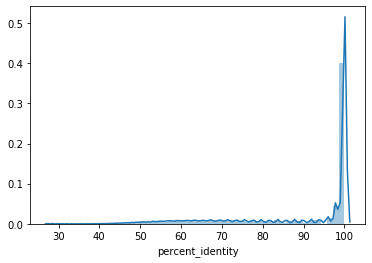

In [183]:
sns.distplot(blastp_results['percent_identity'])

In [184]:
blastp_results['percent_identity'].describe()

count    4.218504e+07
mean     8.975080e+01
std      1.593857e+01
min      2.810000e+01
25%      8.130000e+01
50%      1.000000e+02
75%      1.000000e+02
max      1.000000e+02
Name: percent_identity, dtype: float64

In [185]:
%%time
blastp_results['read_subject_uniprot_match'] = blastp_results['read_uniprot_id_minimal'] == blastp_results['subject_id_minimal']
blastp_results.head()

CPU times: user 13.3 s, sys: 1.62 s, total: 14.9 s
Wall time: 14.7 s


In [186]:
blastp_results.sample(10)

,read_id,subject_id,percent_identity,e_value,bitscore,subject_title,subject_taxid,subject_species,subject_kingdom,subject_superkingdom,subject_phylum,alphabet,ksize,read_uniprot_id,read_uniprot_id_minimal,subject_id_minimal,read_subject_uniprot_match
38632387,read220690/sp|P14635|ENSP00000424588;mate1:424...,sp|O95067|CCNB2_HUMAN,64.6,1.300000e-12,68.6,sp|O95067|CCNB2_HUMAN G2/mitotic-specific cycl...,9606.0,Homo sapiens,Eukaryota,Chordata,NaN,dayhoff,11,sp|P14635|ENSP00000424588,sp|P14635,sp|O95067,False
28195371,read70125/sp|O00155|ENSP00000301917;mate1:360-...,sp|O00155|GPR25_HUMAN,100.0,1.600000e-23,104.8,sp|O00155|GPR25_HUMAN Probable G-protein coupl...,9606.0,Homo sapiens,Eukaryota,Chordata,NaN,dayhoff,21,sp|O00155|ENSP00000301917,sp|O00155,sp|O00155,True
38196827,read796057/sp|Q99595|ENSP00000356256;mate1:117...,sp|O60830|TI17B_HUMAN,81.6,3.900000e-17,83.6,sp|O60830|TI17B_HUMAN Mitochondrial import inn...,9606.0,Homo sapiens,Eukaryota,Chordata,NaN,dayhoff,22,sp|Q99595|ENSP00000356256,sp|Q99595,sp|O60830,False
15282228,read52760/sp|A6NNJ1|ENSP00000497259;mate1:941-...,sp|A8MWA6|F90AM_HUMAN,100.0,3.100000e-22,100.5,sp|A8MWA6|F90AM_HUMAN Putative protein FAM90A2...,9606.0,Homo sapiens,Eukaryota,Chordata,NaN,protein,9,sp|A6NNJ1|ENSP00000497259,sp|A6NNJ1,sp|A8MWA6,False
33475380,read789267/sp|Q96S94|ENSP00000424647;mate1:246...,sp|Q96S94|CCNL2_HUMAN,100.0,2.000000e-21,97.8,sp|Q96S94|CCNL2_HUMAN Cyclin-L2 OS=Homo sapien...,9606.0,Homo sapiens,Eukaryota,Chordata,NaN,dayhoff,28,sp|Q96S94|ENSP00000424647,sp|Q96S94,sp|Q96S94,True
16383163,read305088/sp|P50148|ENSP00000286548;mate1:754...,sp|P50148|GNAQ_HUMAN,100.0,4.000000e-25,110.2,sp|P50148|GNAQ_HUMAN Guanine nucleotide-bindin...,9606.0,Homo sapiens,Eukaryota,Chordata,NaN,protein,13,sp|P50148|ENSP00000286548,sp|P50148,sp|P50148,True
29573450,read554932/sp|Q70EL2|ENSP00000424372;mate1:104...,sp|Q70EL2|UBP45_HUMAN,100.0,9.800000e-24,105.5,sp|Q70EL2|UBP45_HUMAN Ubiquitin carboxyl-termi...,9606.0,Homo sapiens,Eukaryota,Chordata,NaN,protein,23,sp|Q70EL2|ENSP00000424372,sp|Q70EL2,sp|Q70EL2,True
38630444,read218830/sp|P13929|ENSP00000431087;mate1:905...,sp|P13929|ENOB_HUMAN,100.0,3.100000e-22,100.5,sp|P13929|ENOB_HUMAN Beta-enolase OS=Homo sapi...,9606.0,Homo sapiens,Eukaryota,Chordata,NaN,dayhoff,11,sp|P13929|ENSP00000431087,sp|P13929,sp|P13929,True
1047721,read218248/sp|P13747|ENSP00000409910;mate1:17-...,sp|P13747|HLAE_HUMAN,100.0,2.300000e-25,110.9,sp|P13747|HLAE_HUMAN HLA class I histocompatib...,9606.0,Homo sapiens,Eukaryota,Chordata,NaN,protein,12,sp|P13747|ENSP00000409910,sp|P13747,sp|P13747,True
30961067,read58244/sp|A8MXQ7|ENSP00000489685;mate1:1120...,sp|A8MXQ7|YH010_HUMAN,67.1,8.400000e-20,92.4,sp|A8MXQ7|YH010_HUMAN Putative IQ motif and an...,9606.0,Homo sapiens,Eukaryota,Chordata,NaN,protein,26,sp|A8MXQ7|ENSP00000489685,sp|A8MXQ7,sp|A8MXQ7,True


In [187]:
blastp_results['subject_id_minimal'].head().values

array(['tr|A0A024R1R8', 'sp|Q9Y2S6', 'tr|A0A024R1R8', 'sp|Q9Y2S6',
       'tr|A0A024R1R8'], dtype=object)

In [188]:
blastp_results['subject_id'].head().values

array(['tr|A0A024R1R8|A0A024R1R8_HUMAN', 'sp|Q9Y2S6|TMA7_HUMAN',
       'tr|A0A024R1R8|A0A024R1R8_HUMAN', 'sp|Q9Y2S6|TMA7_HUMAN',
       'tr|A0A024R1R8|A0A024R1R8_HUMAN'], dtype=object)

In [195]:
%%time
blastp_matches = blastp_results.groupby(['alphabet', 'ksize'])['read_subject_uniprot_match'].sum()
blastp_matches.head()

CPU times: user 4.77 s, sys: 1min 32s, total: 1min 37s
Wall time: 1min 38s


In [196]:
blastp_matches.head()

alphabet  ksize
dayhoff   9        739060.0
          10       657533.0
          11       602626.0
          12       587366.0
          13       583132.0
Name: read_subject_uniprot_match, dtype: float64

In [197]:
blastp_matches_percent_per_read = blastp_results.groupby(['alphabet', 'ksize', 'read_id'])['read_subject_uniprot_match'].apply(lambda x: x.sum()/len(x))
print(blastp_matches_percent_per_read.shape)
blastp_matches_percent_per_read.head()

(25622052,)


alphabet  ksize  read_id                                                           
dayhoff   9      read1/tr|A0A024R1R8|ENSP00000491117;mate1Start:1;mate2Start:1         0.500000
                 read10/tr|A0A024R1R8|ENSP00000491117;mate1Start:1;mate2Start:1        0.500000
                 read100/sp|A0A024RBG1|ENSP00000492425;mate1:221-370;mate2:280-429     0.333333
                 read10000/sp|A0A0B4J1V1|ENSP00000487805;mate1:77-226;mate2:131-280    0.333333
                 read100000/sp|O43294|ENSP00000457586;mate1:8-157;mate2:88-237         1.000000
Name: read_subject_uniprot_match, dtype: float64

In [199]:
2+2

4

In [204]:
blastp_matches_percent_per_read_percent = blastp_matches_percent_per_read * 100
blastp_matches_percent_per_read_df = blastp_matches_percent_per_read_percent.reset_index()
# blastp_matches_percent_per_read_df =
print(blastp_matches_percent_per_read_df.shape)
blastp_matches_percent_per_read_df.head()

(25622052, 4)


,alphabet,ksize,read_id,read_subject_uniprot_match
0,dayhoff,9,read1/tr|A0A024R1R8|ENSP00000491117;mate1Start...,50.000000
1,dayhoff,9,read10/tr|A0A024R1R8|ENSP00000491117;mate1Star...,50.000000
2,dayhoff,9,read100/sp|A0A024RBG1|ENSP00000492425;mate1:22...,33.333333
3,dayhoff,9,read10000/sp|A0A0B4J1V1|ENSP00000487805;mate1:...,33.333333
4,dayhoff,9,read100000/sp|O43294|ENSP00000457586;mate1:8-1...,100.000000


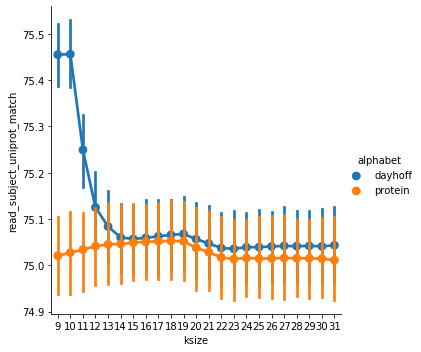

In [203]:
sns.catplot(x='ksize', hue='alphabet', y='read_subject_uniprot_match', 
            data=blastp_matches_percent_per_read_df, kind='point')

In [205]:
blastp_matches_df = blastp_matches.reset_index()
blastp_matches_df.head()

,alphabet,ksize,read_subject_uniprot_match
0,dayhoff,9,739060.0
1,dayhoff,10,657533.0
2,dayhoff,11,602626.0
3,dayhoff,12,587366.0
4,dayhoff,13,583132.0


In [206]:
# sns.catplot(blastp_matches)

In [191]:
2+2

4

# Subset to only reads from complete protein sequences -- no fragments

## Get good uniprot ids, starting with M and ATG

In [53]:
uniprot_protein_starts_with_m = []

with screed.open('/home/olga/data_lg/data_sm_copy/kmer-hashing/quest-for-orthologs/data/2019/Eukaryota/UP000005640_9606.fasta') as records:
    for record in records:
        if record['sequence'].startswith("M"):
            uniprot_protein_starts_with_m.append('|'.join(record['name'].split()[0].split('|')[:2]))
print('uniprot_protein_starts_with_m', len(uniprot_protein_starts_with_m))


uniprot_dna_starts_with_atg = []
with screed.open('/home/olga/data_lg/data_sm_copy/kmer-hashing/quest-for-orthologs/data/2019/Eukaryota/UP000005640_9606_DNA.fasta') as records:
    for record in records:
        if record['sequence'].startswith("ATG"):
            uniprot_dna_starts_with_atg.append('|'.join(record['name'].split()[0].split('|')[:2]))
print('uniprot_dna_starts_with_atg', len(uniprot_dna_starts_with_atg))

uniprot_protein_starts_with_m 20483
uniprot_dna_starts_with_atg 20336


In [54]:
uniprot_dna_starts_with_atg[:3]

['tr|A0A024R161', 'tr|A0A024R1R8', 'sp|A0A024RBG1']

In [55]:
uniprot_protein_starts_with_m[:3]

['tr|A0A024R1R8', 'sp|A0A024RBG1', 'tr|A0A075B6H5']

In [56]:
uniprot_starts_with_atg_and_m = set(uniprot_dna_starts_with_atg).intersection(set(uniprot_protein_starts_with_m))
len(uniprot_starts_with_atg_and_m)

19909

In [59]:
uniprot_starts_with_atg_and_m_list = list(uniprot_starts_with_atg_and_m)
uniprot_starts_with_atg_and_m_list[:5]

['tr|A0A024R1R8', 'sp|P08151', 'sp|Q9HCK5', 'sp|Q96PN8', 'sp|O60336']

In [42]:
! grep -c '>' '/home/olga/data_lg/data_sm_copy/kmer-hashing/quest-for-orthologs/data/2019/Eukaryota/UP000005640_9606_DNA.fasta'

20917


In [43]:
! grep -c '>' '/home/olga/data_lg/data_sm_copy/kmer-hashing/quest-for-orthologs/data/2019/Eukaryota/UP000005640_9606.fasta'

20874


In [35]:
uniprot_dna_starts_with_atg[:3]

['tr|A0A024R161|ENSP00000363412',
 'tr|A0A024R1R8|ENSP00000491117',
 'sp|A0A024RBG1|ENSP00000338352']

## Write good uniprot ids to file

In [103]:
good_uniprot_records = []
with screed.open('/home/olga/data_lg/data_sm_copy/kmer-hashing/quest-for-orthologs/data/2019/Eukaryota/UP000005640_9606_DNA.fasta') as records:
    for record in records:
        clean_uniprot_id = '|'.join(record['name'].split('|')[:2])
        if clean_uniprot_id in uniprot_starts_with_atg_and_m:
            good_uniprot_records.append(record)
len(good_uniprot_records)

19909

In [108]:
good_uniprot_records[:3]

[{'name': 'tr|A0A024R1R8|ENSP00000491117', 'sequence': 'ATGTCCAGCCACGAAGGTGGCAAGAAGAAGGCACTGAAACAGCCCAAGAAGCAGGCCAAGGAGATGGACGAGGAAGAGAAGGCTTTCAAGCAGAAACAAAAAGAGGAGCAGAAGAAACTCGAGGTGCTAAAAGCGAAGGTCGTGGGGAAGGGGCCTCTGGCCACAGGTGGAATTAAGAAATCTGGCAAAAAATAA', 'description': ''},
 {'name': 'sp|A0A024RBG1|ENSP00000338352', 'sequence': 'ATGATGAAGTTCAAGCCCAACCAGACGCGGACCTACGACCGCGAGGGCTTCAAGAAGCGGGCGGCGTGCCTGTGCTTCCGGAGCGAGCAGGAGGACGAGGTGCTGCTGGTGAGTAGCAGCCGGTACCCAGACCAGTGGATTGTCCCAGGAGGAGGAATGGAACCCGAGGAGGAACCTGGCGGTGCTGCCGTGAGGGAAGTTTATGAGGAGGCTGGAGTCAAAGGAAAACTAGGCAGACTTCTGGGCATATTTGAGCAGAACCAAGACCGAAAGCACAGAACATATGTTTATGTTCTAACAGTCACTGAAATATTAGAAGATTGGGAAGATTCTGTTAATATTGGAAGGAAGAGAGAGTGGTTCAAAGTAGAAGATGCTATCAAAGTTCTCCAGTGTCATAAACCTGTACATGCAGAGTATCTGGAAAAGCTAAAGCTGGGTTGTTCCCCAGCCAATGGAAATTCTACAGTCCCTTCCCTTCCGGATAATAATGCCTTGTTTGTAACCGCTGCACAGACCTCTGGGTTGCCATCTAGTGTAAGATAG', 'description': ''},
 {'name': 'tr|A0A075B6H5|ENSP00000368747', 'sequence': 'ATGGAGACAGTGGTCACAACTCTCCCCAGAGAAGGTGGTGTGGGG

In [102]:
record['name']

'tr|X6R8D5|ENSP00000362054'

In [104]:
with open('/home/olga/data_lg/data_sm_copy/kmer-hashing/quest-for-orthologs/data/2019/Eukaryota/UP000005640_9606_DNA__startswith_atg_and_protein_startswith_m.fasta', 'w') as f:
    for record in good_uniprot_records:
        f.write(f'>{record["name"]}\n{record["sequence"]}\n')


In [105]:
good_uniprot_records_dict = {'|'.join(r['name'].split('|')[:2]): r['sequence'] for r in good_uniprot_records}
len(good_uniprot_records_dict)

19909

In [110]:
good_uniprot_records_series = pd.Series(good_uniprot_records_dict)

In [109]:
good_uniprot_records_dict['tr|A0A024R1R8']

'ATGTCCAGCCACGAAGGTGGCAAGAAGAAGGCACTGAAACAGCCCAAGAAGCAGGCCAAGGAGATGGACGAGGAAGAGAAGGCTTTCAAGCAGAAACAAAAAGAGGAGCAGAAGAAACTCGAGGTGCTAAAAGCGAAGGTCGTGGGGAAGGGGCCTCTGGCCACAGGTGGAATTAAGAAATCTGGCAAAAAATAA'

In [ ]:
uniprot_dna_starts_with_atg[:3]

# Get protein, k=11 and dayhoff, k=17 csvs

In [36]:
ls -lha $translate_dir/molecule-protein_ksize-11/

total 1.4G
drwxr-xr-x  2 olga czb 4.0K Aug 28 09:32 ./
drwxr-xr-x 48 olga czb 4.0K Sep 15 12:00 ../
-rw-r--r--  1 olga czb 130M Aug 28 09:32 Homo_sapiens_9606_qfo_dna_01__molecule-protein_ksize-11__coding_reads_nucleotides.fasta
-rw-r--r--  1 olga czb  78M Aug 28 09:32 Homo_sapiens_9606_qfo_dna_01__molecule-protein_ksize-11__coding_reads_peptides.fasta
-rw-r--r--  1 olga czb 809M Aug 28 09:32 Homo_sapiens_9606_qfo_dna_01__molecule-protein_ksize-11__coding_scores.csv
-rw-r--r--  1 olga czb 1.5K Aug 28 09:31 Homo_sapiens_9606_qfo_dna_01__molecule-protein_ksize-11__coding_summary.json
-rw-r--r--  1 olga czb 368M Aug 28 09:32 Homo_sapiens_9606_qfo_dna_01__molecule-protein_ksize-11__noncoding_reads_nucleotides.fasta


In [40]:
! rg 'tr|A0A024R161|ENSP00000363412' $translate_dir/molecule-protein_ksize-11/Homo_sapiens_9606_qfo_dna_01__molecule-protein_ksize-11__coding_scores.csv | head

read_id,jaccard_in_peptide_db,n_kmers,category,translation_frame,filename
read1/tr|A0A024R1R8|ENSP00000491117;mate1Start:1;mate2Start:1,1.0,40.0,Coding,1,Homo_sapiens_9606_qfo_dna_01.fq.gz
read1/tr|A0A024R1R8|ENSP00000491117;mate1Start:1;mate2Start:1,nan,nan,Translation frame has stop codon(s),2,Homo_sapiens_9606_qfo_dna_01.fq.gz
read1/tr|A0A024R1R8|ENSP00000491117;mate1Start:1;mate2Start:1,0.0,39.0,Non-coding,3,Homo_sapiens_9606_qfo_dna_01.fq.gz
read1/tr|A0A024R1R8|ENSP00000491117;mate1Start:1;mate2Start:1,nan,nan,Translation frame has stop codon(s),-1,Homo_sapiens_9606_qfo_dna_01.fq.gz
read1/tr|A0A024R1R8|ENSP00000491117;mate1Start:1;mate2Start:1,0.0,39.0,Non-coding,-2,Homo_sapiens_9606_qfo_dna_01.fq.gz
read1/tr|A0A024R1R8|ENSP00000491117;mate1Start:1;mate2Start:1,nan,nan,Translation frame has stop codon(s),-3,Homo_sapiens_9606_qfo_dna_01.fq.gz
read2/tr|A0A024R1R8|ENSP00000491117;mate1Start:1;mate2Start:1,0.975,40.0,Coding,1,Homo_sapiens_9606_qfo_dna_01.fq.gz
read2/tr|A0A024R1R8|ENSP

In [41]:
! rg 'sp|A0A024RBG1|ENSP00000338352' $translate_dir/molecule-protein_ksize-11/Homo_sapiens_9606_qfo_dna_01__molecule-protein_ksize-11__coding_scores.csv | head

read51/sp|A0A024RBG1|ENSP00000492425;mate1:130-279;mate2:281-430,nan,nan,Translation frame has stop codon(s),1,Homo_sapiens_9606_qfo_dna_01.fq.gz
read51/sp|A0A024RBG1|ENSP00000492425;mate1:130-279;mate2:281-430,nan,nan,Translation frame has stop codon(s),2,Homo_sapiens_9606_qfo_dna_01.fq.gz
read51/sp|A0A024RBG1|ENSP00000492425;mate1:130-279;mate2:281-430,nan,nan,Translation frame has stop codon(s),3,Homo_sapiens_9606_qfo_dna_01.fq.gz
read51/sp|A0A024RBG1|ENSP00000492425;mate1:130-279;mate2:281-430,nan,nan,Translation frame has stop codon(s),-1,Homo_sapiens_9606_qfo_dna_01.fq.gz
read51/sp|A0A024RBG1|ENSP00000492425;mate1:130-279;mate2:281-430,nan,nan,Translation frame has stop codon(s),-2,Homo_sapiens_9606_qfo_dna_01.fq.gz
read51/sp|A0A024RBG1|ENSP00000492425;mate1:130-279;mate2:281-430,1.0,39.0,Coding,-3,Homo_sapiens_9606_qfo_dna_01.fq.gz
read52/sp|A0A024RBG1|ENSP00000492425;mate1:125-274;mate2:193-342,nan,nan,Translation frame has stop codon(s),1,Homo_sapiens_9606_qfo_dna_01.fq.gz
rea

## Protein k=11 coding score csvs

In [60]:
protein_k11 = pd.read_csv(f'{translate_dir}/molecule-protein_ksize-11/Homo_sapiens_9606_qfo_dna_01__molecule-protein_ksize-11__coding_scores.csv')
protein_k11['alphabet'] = 'protein'
protein_k11['ksize'] = 11
protein_k11.head()

,read_id,jaccard_in_peptide_db,n_kmers,category,translation_frame,filename,alphabet,ksize
0,read1/tr|A0A024R1R8|ENSP00000491117;mate1Start...,1.0,40.0,Coding,1,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11
1,read1/tr|A0A024R1R8|ENSP00000491117;mate1Start...,NaN,NaN,Translation frame has stop codon(s),2,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11
2,read1/tr|A0A024R1R8|ENSP00000491117;mate1Start...,0.0,39.0,Non-coding,3,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11
3,read1/tr|A0A024R1R8|ENSP00000491117;mate1Start...,NaN,NaN,Translation frame has stop codon(s),-1,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11
4,read1/tr|A0A024R1R8|ENSP00000491117;mate1Start...,0.0,39.0,Non-coding,-2,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11


In [63]:
%%time
protein_k11['uniprot_id'] = protein_k11['read_id'].str.extract('read\d+\/(\w+\|\w+)|\w+;')
protein_k11.head()

CPU times: user 18.2 s, sys: 354 ms, total: 18.6 s
Wall time: 18.6 s


In [ ]:
protein_k11.shape

### Look at only good uniprot ids

In [64]:
protein_k11_good_uniprot_ids = protein_k11.query('uniprot_id in @uniprot_starts_with_atg_and_m')
print(protein_k11_good_uniprot_ids.shape)
protein_k11_good_uniprot_ids.head()

(5911206, 9)


,read_id,jaccard_in_peptide_db,n_kmers,category,translation_frame,filename,alphabet,ksize,uniprot_id
0,read1/tr|A0A024R1R8|ENSP00000491117;mate1Start...,1.0,40.0,Coding,1,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11,tr|A0A024R1R8
1,read1/tr|A0A024R1R8|ENSP00000491117;mate1Start...,NaN,NaN,Translation frame has stop codon(s),2,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11,tr|A0A024R1R8
2,read1/tr|A0A024R1R8|ENSP00000491117;mate1Start...,0.0,39.0,Non-coding,3,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11,tr|A0A024R1R8
3,read1/tr|A0A024R1R8|ENSP00000491117;mate1Start...,NaN,NaN,Translation frame has stop codon(s),-1,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11,tr|A0A024R1R8
4,read1/tr|A0A024R1R8|ENSP00000491117;mate1Start...,0.0,39.0,Non-coding,-2,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11,tr|A0A024R1R8


In [81]:
protein_k11_good_uniprot_ids.read_id.head(20).values

array(['read1/tr|A0A024R1R8|ENSP00000491117;mate1Start:1;mate2Start:1',
       'read1/tr|A0A024R1R8|ENSP00000491117;mate1Start:1;mate2Start:1',
       'read1/tr|A0A024R1R8|ENSP00000491117;mate1Start:1;mate2Start:1',
       'read1/tr|A0A024R1R8|ENSP00000491117;mate1Start:1;mate2Start:1',
       'read1/tr|A0A024R1R8|ENSP00000491117;mate1Start:1;mate2Start:1',
       'read1/tr|A0A024R1R8|ENSP00000491117;mate1Start:1;mate2Start:1',
       'read2/tr|A0A024R1R8|ENSP00000491117;mate1Start:1;mate2Start:1',
       'read2/tr|A0A024R1R8|ENSP00000491117;mate1Start:1;mate2Start:1',
       'read2/tr|A0A024R1R8|ENSP00000491117;mate1Start:1;mate2Start:1',
       'read2/tr|A0A024R1R8|ENSP00000491117;mate1Start:1;mate2Start:1',
       'read2/tr|A0A024R1R8|ENSP00000491117;mate1Start:1;mate2Start:1',
       'read2/tr|A0A024R1R8|ENSP00000491117;mate1Start:1;mate2Start:1',
       'read3/tr|A0A024R1R8|ENSP00000491117;mate1Start:1;mate2Start:1',
       'read3/tr|A0A024R1R8|ENSP00000491117;mate1Start:1;mate2St

### Look at only good uniprot ids, is coding

In [66]:
protein_k11_good_uniprot_ids_is_coding = protein_k11_good_uniprot_ids.groupby('read_id').apply(lambda x: (x.category == 'Coding').any())
print(protein_k11_good_uniprot_ids_is_coding.shape)
protein_k11_good_uniprot_ids_is_coding.head()

(985201,)


read_id
read1/tr|A0A024R1R8|ENSP00000491117;mate1Start:1;mate2Start:1          True
read10/tr|A0A024R1R8|ENSP00000491117;mate1Start:1;mate2Start:1         True
read100/sp|A0A024RBG1|ENSP00000492425;mate1:221-370;mate2:280-429      True
read1000/sp|A0A075B6K2|ENSP00000374848;mate1:5-154;mate2:37-186       False
read10000/sp|A0A0B4J1V1|ENSP00000487805;mate1:77-226;mate2:131-280    False
dtype: bool

In [75]:
protein_k11_good_uniprot_ids_is_coding.sample(10)

read_id
read341353/sp|P62269|ENSP00000416110;mate1:91-240;mate2:207-356          True
read993589/sp|Q9Y3D8|ENSP00000484679;mate1:32-181;mate2:154-303          True
read885153/sp|Q9HCI6|ENSP00000359768;mate1:1139-1288;mate2:1240-1389     True
read881020/sp|Q9HBH1|ENSP00000288022;mate1:311-460;mate2:420-569         True
read222205/sp|P15121|ENSP00000285930;mate1:426-575;mate2:492-641         True
read371246/sp|Q07283|ENSP00000480484;mate1:3713-3862;mate2:3854-4003     True
read419293/sp|Q15388|ENSP00000355566;mate1:9-158;mate2:141-290           True
read870674/sp|Q9H7R0|ENSP00000440162;mate1:1075-1224;mate2:1216-1365    False
read212687/sp|P11586|ENSP00000450560;mate1:122-271;mate2:217-366        False
read235760/sp|P19838|ENSP00000469340;mate1:1164-1313;mate2:1271-1420    False
dtype: bool

### Grep dna fasta for the sequence

In [69]:
human_dna_fasta = '/home/olga/data_lg/data_sm_copy/kmer-hashing/quest-for-orthologs/data/2019/Eukaryota/UP000005640_9606_DNA.fasta'
human_protein_fasta = '/home/olga/data_lg/data_sm_copy/kmer-hashing/quest-for-orthologs/data/2019/Eukaryota/UP000005640_9606.fasta'

In [77]:
! grep -A 1 'sp|A0A075B6K2|ENSP00000374848' $human_dna_fasta

>sp|A0A075B6K2|ENSP00000374848
ATGGCCTGGACCCCTCTCCTCCTCAGCCTCCTCGCTCACTGCACAGGCTCTGCGACCTCC


In [73]:
reads_dir = '/home/olga/data_lg/data_sm_copy/immune-evolution/rawdata/simulated/human'

In [76]:
! zgrep -A 3 'read1000/sp|A0A075B6K2|ENSP00000374848;mate1:5-154;mate2:37-186' $reads_dir/*.fq.gz

@read1000/sp|A0A075B6K2|ENSP00000374848;mate1:5-154;mate2:37-186
CCTGGACCCCTCTCCTCCTCAGCCTCCTCGCTCACTGCACAGGCTCTGCGACCTCCTNTGAGCTGACTCAGCCACACTCAGTGTCAGTGGCTACAGCACAGATGGCCAGGATCACCTGTGGGGGAAACAACATTGGAAGTAAAGCTGTGC
+
IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII


In [78]:
protein_k11_good_uniprot_ids.query('read_id == "read1000/sp|A0A075B6K2|ENSP00000374848;mate1:5-154;mate2:37-186"')

,read_id,jaccard_in_peptide_db,n_kmers,category,translation_frame,filename,alphabet,ksize,uniprot_id
5994,read1000/sp|A0A075B6K2|ENSP00000374848;mate1:5...,NaN,NaN,Translation frame has stop codon(s),1,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11,sp|A0A075B6K2
5995,read1000/sp|A0A075B6K2|ENSP00000374848;mate1:5...,NaN,NaN,Translation frame has stop codon(s),2,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11,sp|A0A075B6K2
5996,read1000/sp|A0A075B6K2|ENSP00000374848;mate1:5...,0.717949,39.0,Non-coding,3,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11,sp|A0A075B6K2
5997,read1000/sp|A0A075B6K2|ENSP00000374848;mate1:5...,NaN,NaN,Translation frame has stop codon(s),-1,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11,sp|A0A075B6K2
5998,read1000/sp|A0A075B6K2|ENSP00000374848;mate1:5...,NaN,NaN,Translation frame has stop codon(s),-2,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11,sp|A0A075B6K2
5999,read1000/sp|A0A075B6K2|ENSP00000374848;mate1:5...,NaN,NaN,Translation frame has stop codon(s),-3,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11,sp|A0A075B6K2


In [86]:
protein_k11_good_uniprot_ids_coding = protein_k11_good_uniprot_ids.query('category == "Coding"')
print(protein_k11_good_uniprot_ids_coding.shape)
protein_k11_good_uniprot_ids_coding.head()

(524484, 9)


,read_id,jaccard_in_peptide_db,n_kmers,category,translation_frame,filename,alphabet,ksize,uniprot_id
0,read1/tr|A0A024R1R8|ENSP00000491117;mate1Start...,1.000,40.0,Coding,1,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11,tr|A0A024R1R8
6,read2/tr|A0A024R1R8|ENSP00000491117;mate1Start...,0.975,40.0,Coding,1,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11,tr|A0A024R1R8
30,read6/tr|A0A024R1R8|ENSP00000491117;mate1Start...,1.000,40.0,Coding,1,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11,tr|A0A024R1R8
36,read7/tr|A0A024R1R8|ENSP00000491117;mate1Start...,1.000,40.0,Coding,1,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11,tr|A0A024R1R8
54,read10/tr|A0A024R1R8|ENSP00000491117;mate1Star...,0.975,40.0,Coding,1,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11,tr|A0A024R1R8


## Check ~60 reads with two translation frames

In [129]:
protein_k11_good_uniprot_ids_coding_two_frames = protein_k11_good_uniprot_ids_coding.groupby('read_id').filter(lambda x: len(x) > 1)
print(protein_k11_good_uniprot_ids_coding_two_frames.shape)
protein_k11_good_uniprot_ids_coding_two_frames.head()

(522, 9)


,read_id,jaccard_in_peptide_db,n_kmers,category,translation_frame,filename,alphabet,ksize,uniprot_id
291918,read48654/sp|A6NJU9|ENSP00000429734;mate1:1241...,1.0,40.0,Coding,1,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11,sp|A6NJU9
291920,read48654/sp|A6NJU9|ENSP00000429734;mate1:1241...,1.0,39.0,Coding,3,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11,sp|A6NJU9
291975,read48663/sp|A6NJU9|ENSP00000429734;mate1:2605...,1.0,40.0,Coding,-1,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11,sp|A6NJU9
291977,read48663/sp|A6NJU9|ENSP00000429734;mate1:2605...,1.0,39.0,Coding,-3,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11,sp|A6NJU9
292023,read48671/sp|A6NJU9|ENSP00000429734;mate1:1409...,1.0,40.0,Coding,-1,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11,sp|A6NJU9


In [177]:
protein_k11_good_uniprot_ids_coding_two_frames.read_id.nunique()

261

In [180]:
protein_k11_good_uniprot_ids_coding_two_frames.groupby('read_id').filter(lambda x: len(x) == 2).read_id.nunique()

261

### Get some random translation frames

In [187]:
import random

In [190]:
random_translation_frames = protein_k11_good_uniprot_ids_coding_two_frames.groupby('read_id').filter(lambda x: random.random() < 0.01)
random_translation_frames

,read_id,jaccard_in_peptide_db,n_kmers,category,translation_frame,filename,alphabet,ksize,uniprot_id
2774880,read462481/sp|Q58A44|BAD93185;mate1:22-171;mat...,1.0,40.0,Coding,1,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11,sp|Q58A44
2774884,read462481/sp|Q58A44|BAD93185;mate1:22-171;mat...,1.0,39.0,Coding,-2,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11,sp|Q58A44
3243548,read540592/tr|Q6YL49|ENSP00000483175;mate1:182...,1.0,39.0,Coding,3,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11,tr|Q6YL49
3243549,read540592/tr|Q6YL49|ENSP00000483175;mate1:182...,1.0,40.0,Coding,-1,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11,tr|Q6YL49
3699626,read616605/sp|Q8IZM0|AAN65378;mate1:8-157;mate...,1.0,39.0,Coding,3,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11,sp|Q8IZM0
3699629,read616605/sp|Q8IZM0|AAN65378;mate1:8-157;mate...,1.0,39.0,Coding,-3,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11,sp|Q8IZM0
4297615,read716270/sp|Q902F9|AAL18258;mate1:116-265;ma...,1.0,39.0,Coding,2,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11,sp|Q902F9
4297616,read716270/sp|Q902F9|AAL18258;mate1:116-265;ma...,1.0,39.0,Coding,3,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11,sp|Q902F9


In [192]:
random_translation_frames.read_id.unique()

array(['read462481/sp|Q58A44|BAD93185;mate1:22-171;mate2:88-237',
       'read540592/tr|Q6YL49|ENSP00000483175;mate1:182-331;mate2:249-398',
       'read616605/sp|Q8IZM0|AAN65378;mate1:8-157;mate2:92-241',
       'read716270/sp|Q902F9|AAL18258;mate1:116-265;mate2:240-389'],
      dtype=object)

In [196]:
! zgrep -A 4 'read716270/sp|Q902F9|AAL18258;mate1:116-265;mate2:240-389' $reads_dir/*

@read716270/sp|Q902F9|AAL18258;mate1:116-265;mate2:240-389
TGCCATCCACCAAGAAGGCAGAGCCGCCGACTTGGGCACAACTAAAGAAGCTGACGCAGTTAGCTACAAAATATCTAGAGAACACAAAGGTGACACAAACCCCAGAGAGTATGCTGCTTGCAGCCTTGATGATTGTATCAATGGTGGTAA
+
IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII
@read716271/sp|Q902F9|AAL18258;mate1:975-1124;mate2:1042-1191


## Check negative translation frames

In [130]:
protein_k11_good_uniprot_ids_coding.query('translation_frame < 0').read_id.values

array(['read51/sp|A0A024RBG1|ENSP00000492425;mate1:130-279;mate2:281-430',
       'read53/sp|A0A024RBG1|ENSP00000492425;mate1:158-307;mate2:252-401',
       'read55/sp|A0A024RBG1|ENSP00000492425;mate1:183-332;mate2:307-456',
       ..., 'read1014994/sp|W6CW81|AHI87498;mate1:64-213;mate2:154-303',
       'read1014995/sp|W6CW81|AHI87498;mate1:65-214;mate2:155-304',
       'read1014997/sp|W6CW81|AHI87498;mate1:46-195;mate2:187-336'],
      dtype=object)

In [94]:
! zgrep -A 10 'read51/' $reads_dir/*

@read51/sp|A0A024RBG1|ENSP00000492425;mate1:130-279;mate2:281-430
GCTTTTCCAGATACTCTGCATGTACAGGTTTATGACACTGGAGAACTTTGATAGCATCTTCTACTTTGAACCACTCTCTCTTCCTTCCAATATTAACAGAATCTTCCCAATCTTCTAATATTTCAGTGACTGTTAGAACATAAACATATG
+
IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII
@read52/sp|A0A024RBG1|ENSP00000492425;mate1:125-274;mate2:193-342
ACCCAGACCAGTGGATTGTCCCAGGAGGAGGAATGGAACCCGAGGAGGAACCTGGCGGTGCTGCCGTGAGGGAAGTTTATGAGGAGGCTGGAGTCAAAGGAAAACTAGGCAGACTTCTGGGCATATTTGAGCAGAACCAAGACCGAAAGC
+
IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII
@read53/sp|A0A024RBG1|ENSP00000492425;mate1:158-307;mate2:252-401
TTATGACACTGGAGAACTTTGATAGCATCTTCTACTTTGAACCACTCTCTCTTCCTTCCAATATTAACAGAATCTTCCCAATCTTCTAATATTTCAGTGACTGTTAGAACATAAACATATGTTCTGTGCTTTCGGTCTTGGTTCTGCTCA
+


In [89]:
protein_k11_good_uniprot_ids_coding.query('translation_frame < 0').read_id.sample(10).values

array(['read137138/sp|O75969|ENSP00000440994;mate1:1145-1294;mate2:1203-1352',
       'read350491/sp|P78562|ENSP00000368682;mate1:501-650;mate2:588-737',
       'read879877/sp|Q9HB55|ENSP00000416581;mate1:535-684;mate2:665-814',
       'read397871/sp|Q13797|ENSP00000264741;mate1:1515-1664;mate2:1666-1815',
       'read647021/sp|Q8N9R8|ENSP00000362650;mate1:1261-1410;mate2:1337-1486',
       'read562225/sp|Q7RTP6|ENSP00000462033;mate1:450-599;mate2:544-693',
       'read78351/sp|O14493|ENSP00000409544;mate1:266-415;mate2:385-534',
       'read409940/sp|Q14761|ENSP00000325589;mate1:157-306;mate2:276-425',
       'read610788/sp|Q8IYA8|ENSP00000407837;mate1:494-643;mate2:602-751',
       'read310027/sp|P51648|ENSP00000500092;mate1:163-312;mate2:274-423'],
      dtype=object)

In [91]:
! zgrep -A 4 'read137138/sp|O75969|ENSP00000440994;mate1:1145-1294;mate2:1203-1352' $reads_dir/*

@read137138/sp|O75969|ENSP00000440994;mate1:1145-1294;mate2:1203-1352
TCACCCAGAGTTTTCGCACAAGTCTCCTCCTCTGATTTGGGTTCAGAATACATTTTTTCTCTCAATTTAGTTTCAGATTTCATGGCAAAGTTCACATTTCGGTTTTTAGGATCACCCATTCCTTTCATGGAGATGAGGGAATAACTCTCA
+
IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII
@read137139/sp|O75969|ENSP00000440994;mate1:160-309;mate2:238-387


In [79]:
ls -lha $reads_dir

total 37M
drwxr-xr-x 2 olga czb 4.0K Aug 27 08:44 ./
drwxr-xr-x 3 olga czb 4.0K Aug 27 08:38 ../
-rw-r--r-- 1 olga czb  37M Aug 27 08:44 Homo_sapiens_9606_qfo_dna_01.fq.gz


### How many reads are there?

In [199]:
! zgrep -c '@read' $reads_dir/*

1015001


## Get read IDs of reads that don't have an `N`

In [84]:
fastq = f'{reads_dir}/Homo_sapiens_9606_qfo_dna_01.fq.gz'

read_ids_without_n = []
with screed.open(fastq) as records:
    for record in records:
        if "N" not in record['sequence']:
            read_ids_without_n.append(record['name'])
print(len(read_ids_without_n))
read_ids_without_n[:3]

838259


['read1/tr|A0A024R1R8|ENSP00000491117;mate1Start:1;mate2Start:1',
 'read2/tr|A0A024R1R8|ENSP00000491117;mate1Start:1;mate2Start:1',
 'read4/tr|A0A024R1R8|ENSP00000491117;mate1Start:1;mate2Start:1']

In [97]:
protein_k11_good_uniprot_ids_no_ns = protein_k11_good_uniprot_ids.query('read_id in @read_ids_without_n')
print(protein_k11_good_uniprot_ids_no_ns.shape)
protein_k11_good_uniprot_ids_no_ns.head()

(4898100, 9)


,read_id,jaccard_in_peptide_db,n_kmers,category,translation_frame,filename,alphabet,ksize,uniprot_id
0,read1/tr|A0A024R1R8|ENSP00000491117;mate1Start...,1.0,40.0,Coding,1,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11,tr|A0A024R1R8
1,read1/tr|A0A024R1R8|ENSP00000491117;mate1Start...,NaN,NaN,Translation frame has stop codon(s),2,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11,tr|A0A024R1R8
2,read1/tr|A0A024R1R8|ENSP00000491117;mate1Start...,0.0,39.0,Non-coding,3,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11,tr|A0A024R1R8
3,read1/tr|A0A024R1R8|ENSP00000491117;mate1Start...,NaN,NaN,Translation frame has stop codon(s),-1,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11,tr|A0A024R1R8
4,read1/tr|A0A024R1R8|ENSP00000491117;mate1Start...,0.0,39.0,Non-coding,-2,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11,tr|A0A024R1R8


# Infer reading frame from read start -- assume all reads start with ATG

In [114]:
mate1_start_pattern = 'mate1:(?P<mate1_start>\d+)-(\d+)'

re.findall(mate1_start_pattern, 'read350491/sp|P78562|ENSP00000368682;mate1:501-650;mate2:588-737')

[('501', '650')]

In [115]:
! zgrep -A 10 'read51/' $reads_dir/*

@read51/sp|A0A024RBG1|ENSP00000492425;mate1:130-279;mate2:281-430
GCTTTTCCAGATACTCTGCATGTACAGGTTTATGACACTGGAGAACTTTGATAGCATCTTCTACTTTGAACCACTCTCTCTTCCTTCCAATATTAACAGAATCTTCCCAATCTTCTAATATTTCAGTGACTGTTAGAACATAAACATATG
+
IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII
@read52/sp|A0A024RBG1|ENSP00000492425;mate1:125-274;mate2:193-342
ACCCAGACCAGTGGATTGTCCCAGGAGGAGGAATGGAACCCGAGGAGGAACCTGGCGGTGCTGCCGTGAGGGAAGTTTATGAGGAGGCTGGAGTCAAAGGAAAACTAGGCAGACTTCTGGGCATATTTGAGCAGAACCAAGACCGAAAGC
+
IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII
@read53/sp|A0A024RBG1|ENSP00000492425;mate1:158-307;mate2:252-401
TTATGACACTGGAGAACTTTGATAGCATCTTCTACTTTGAACCACTCTCTCTTCCTTCCAATATTAACAGAATCTTCCCAATCTTCTAATATTTCAGTGACTGTTAGAACATAAACATATGTTCTGTGCTTTCGGTCTTGGTTCTGCTCA
+


In [118]:
reads51_52 = protein_k11_good_uniprot_ids.loc[protein_k11_good_uniprot_ids.read_id.str.contains('read51/') | protein_k11_good_uniprot_ids.read_id.str.contains('read52/')]
reads51_52

,read_id,jaccard_in_peptide_db,n_kmers,category,translation_frame,filename,alphabet,ksize,uniprot_id
300,read51/sp|A0A024RBG1|ENSP00000492425;mate1:130...,NaN,NaN,Translation frame has stop codon(s),1,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11,sp|A0A024RBG1
301,read51/sp|A0A024RBG1|ENSP00000492425;mate1:130...,NaN,NaN,Translation frame has stop codon(s),2,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11,sp|A0A024RBG1
302,read51/sp|A0A024RBG1|ENSP00000492425;mate1:130...,NaN,NaN,Translation frame has stop codon(s),3,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11,sp|A0A024RBG1
303,read51/sp|A0A024RBG1|ENSP00000492425;mate1:130...,NaN,NaN,Translation frame has stop codon(s),-1,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11,sp|A0A024RBG1
304,read51/sp|A0A024RBG1|ENSP00000492425;mate1:130...,NaN,NaN,Translation frame has stop codon(s),-2,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11,sp|A0A024RBG1
305,read51/sp|A0A024RBG1|ENSP00000492425;mate1:130...,1.0,39.0,Coding,-3,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11,sp|A0A024RBG1
306,read52/sp|A0A024RBG1|ENSP00000492425;mate1:125...,NaN,NaN,Translation frame has stop codon(s),1,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11,sp|A0A024RBG1
307,read52/sp|A0A024RBG1|ENSP00000492425;mate1:125...,NaN,NaN,Translation frame has stop codon(s),2,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11,sp|A0A024RBG1
308,read52/sp|A0A024RBG1|ENSP00000492425;mate1:125...,1.0,39.0,Coding,3,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11,sp|A0A024RBG1
309,read52/sp|A0A024RBG1|ENSP00000492425;mate1:125...,NaN,NaN,Translation frame has stop codon(s),-1,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11,sp|A0A024RBG1


## Hamming distance function

from http://claresloggett.github.io/python_workshops/improved_hammingdist.html

In [125]:
# Return the Hamming distance between string1 and string2.
# string1 and string2 should be the same length.
def hamming_distance(string1, string2): 
    # Start with a distance of zero, and count up
    distance = 0
    # Loop over the indices of the string
    L = len(string1)
    for i in range(L):
        # Add 1 to the distance if these two characters are not equal
        if string1[i] != string2[i]:
            distance += 1
    # Return the final count of differences
    return distance


# Reveres complemeent

old_chars = "ACGT"
replace_chars = "TGCA"
tab = str.maketrans(old_chars,replace_chars)

def reverse_complement(sequence):
    return sequence.translate(tab)[::-1]

def rev_compl(st):
    nn = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A'}
    return "".join(nn[n] for n in reversed(st))

### read 51 is coding in negative frame, and mate2!!

```
@read51/sp|A0A024RBG1|ENSP00000492425;mate1:130-279;mate2:281-430
GCTTTTCCAGATACTCTGCATGTACAGGTTTATGACACTGGAGAACTTTGATAGCATCTTCTACTTTGAACCACTCTCTCTTCCTTCCAATATTAACAGAATCTTCCCAATCTTCTAATATTTCAGTGACTGTTAGAACATAAACATATG
+
IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII
```

In [149]:
hamming_distance(good_uniprot_records_dict['sp|A0A024RBG1'][280:429], 
                 'GCTTTTCCAGATACTCTGCATGTACAGGTTTATGACACTGGAGAACTTTGATAGCATCTTCTACTTTGAACCACTCTCTCTTCCTTCCAATATTAACAGAATCTTCCCAATCTTCTAATATTTCAGTGACTGTTAGAACATAAACATATG')

111

### Read 52 is coding in positive frame

```
@read52/sp|A0A024RBG1|ENSP00000492425;mate1:125-274;mate2:193-342
ACCCAGACCAGTGGATTGTCCCAGGAGGAGGAATGGAACCCGAGGAGGAACCTGGCGGTGCTGCCGTGAGGGAAGTTTATGAGGAGGCTGGAGTCAAAGGAAAACTAGGCAGACTTCTGGGCATATTTGAGCAGAACCAAGACCGAAAGC
+
IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII
```


In [123]:
hamming_distance(good_uniprot_records_dict['sp|A0A024RBG1'][124:273], 
                 'ACCCAGACCAGTGGATTGTCCCAGGAGGAGGAATGGAACCCGAGGAGGAACCTGGCGGTGCTGCCGTGAGGGAAGTTTATGAGGAGGCTGGAGTCAAAGGAAAACTAGGCAGACTTCTGGGCATATTTGAGCAGAACCAAGACCGAAAGC')

0

In [ ]:
human_dna = {}
with screed.open()

## Function to actually infer translation frame

In [465]:
# %%time

# https://regex101.com/r/WNtXD8/1/
interval_patterns = 'mate1:(?P<mate1_start>\d+)-(\d+);mate2:(\d+)-(\d+)'



def get_strand(canonical_seq, record_seq):
#     import pdb ; pdb.set_trace()
    try:
        n_mismatches = hamming_distance(canonical_seq, record_seq)
    except IndexError:
        # Lengths don't match, ignore this read
        return None
    if n_mismatches > 10:
        # Make sure it's really the reverse complement
        revcomp = reverse_complement(record_seq)
        try:
            n_mismatches = hamming_distance(canonical_seq, revcomp)
        except IndexError:
            # Lengths don't match, ignore this read
            return None
        # Not too many mismatches
        if n_mismatches <= 10:
            strand = -1
        else:
            strand = None
    else:
        strand = 1
#     if strand is None:
#         raise ValueError
    return strand


def get_correct_reading_frame(record, required_length=150, verbose=False):
    name = record['name']
    if 'mate1Start' in name:
        frame = 1
    else:
        # Subtract 1 since the fastq file uses 1-based indexing for the start/stop but python is 0-based
        try:
            start1, end1, start2, end2 = map(lambda x: int(x) - 1 , re.findall(interval_patterns, name)[0])
        except IndexError:
            # Read id has negative values and otherwise doesn't match my mental model --> ignore
            return None
        
        end1 += 1
#         start2 += 1
        end2 += 1


        uniprot_id = '|'.join(name.split(';')[0].split('/')[-1].split('|')[:2])
        try:
            canonical_sequence = good_uniprot_records_dict[uniprot_id]
        except KeyError:
            # Uniprot record doesn't have clear start/stop site, so difficult to infer frame --> skip
            return None
        
        canonical_length = len(canonical_sequence)
        if end1 > canonical_length or end2 > canonical_length:
            # Read extends past the boundary of the source sequence --> skip
            return None
        

        mate1 = canonical_sequence[start1:end1]
        mate2 = canonical_sequence[start2:end2]
        assert len(mate1) == required_length
        assert len(mate2) == required_length
        
        if verbose:
            print(name)
            print(f'start1: {start1} -- end1: {end1}')
            print(f'start2: {start2} -- end2: {end2}')

        if verbose > 1:
            print(f'>mate1\n{mate1}')
            print(f'>mate1_rc\n{reverse_complement(mate1)}')
        if verbose > 1:
            print(f'>mate2\n{mate2}')
            print(f'>mate2_rc\n{reverse_complement(mate2)}')
        
        frame_number = 3 - ((start1 -1 )% 3) 
        if verbose > 1:
            print(f'{frame_number} = (({start1} + 1) % 3) + 1')

#         frame_number = ((start1)% 3) + 1

        record_seq = record['sequence']
        if verbose > 1:
            print(f'>record\n{record_seq}')
            print(f'>record_rc\n{reverse_complement(record_seq)}')

        if verbose:
            print('--- Trying mate 1 ---')
        strand = get_strand(mate1, record_seq)
        if verbose and strand is not None:
            if strand > 0:
                print('mate1')
            if strand < 0:
                print('mate1, reverse complement')

        
        if strand is None:
            if verbose:
                print('--- Not mate1, trying mate 2 ---')
            # Maybe it's mate2?
#             strand = -1
            strand = get_strand(mate2, record_seq)
            frame_number = 3 - ((start2 - 1 ) % 3)
            
            if verbose and strand is not None:
                print(f'{frame_number} = (({start2} + 1) % 3) + 1')
                if strand > 0:
                    print('mate2')
                if strand < 0:
                    print('mate2, reverse complement')
                

        # Multiply the frame number by the strand multiplier
        try:
            frame = frame_number * strand
            if verbose:
                print(f'{frame} = {frame_number} * {strand}')
        except TypeError:
            # Strand is still none, don't know what's going on so skip this read
            frame = None
    return frame
            

def fastq_per_read_frame(fastq, verbose=False):
    read_id_to_frame = {}
    with screed.open(fastq) as records:
        for record in tqdm(records):
    #         if 'read52/' in record['name']:
    #             break
            if verbose:
                print('\n---')
            frame = get_correct_reading_frame(record, required_length=150, verbose=verbose)
            if verbose:
                print(f'frame: {frame}')
            if frame is not None:
                read_id_to_frame[record['name']] = frame

    read_id_to_frame_series = pd.Series(read_id_to_frame, name='translation_frame')
    print(read_id_to_frame_series.shape)
    read_id_to_frame_series.head()
    return read_id_to_frame_series

## Make mini fastq for testing

In [441]:
# for read_id in protein_k11_good_uniprot_ids_no_ns_coding.sample(5).read_id.values:

#     ! zgrep -A 3 "$read_id" $reads_dir/*

In [435]:
%%file mini.fastq
@read51/sp|A0A024RBG1|ENSP00000492425;mate1:130-279;mate2:281-430__frame=-3
GCTTTTCCAGATACTCTGCATGTACAGGTTTATGACACTGGAGAACTTTGATAGCATCTTCTACTTTGAACCACTCTCTCTTCCTTCCAATATTAACAGAATCTTCCCAATCTTCTAATATTTCAGTGACTGTTAGAACATAAACATATG
+
IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII
@read52/sp|A0A024RBG1|ENSP00000492425;mate1:125-274;mate2:193-342__frame=3
ACCCAGACCAGTGGATTGTCCCAGGAGGAGGAATGGAACCCGAGGAGGAACCTGGCGGTGCTGCCGTGAGGGAAGTTTATGAGGAGGCTGGAGTCAAAGGAAAACTAGGCAGACTTCTGGGCATATTTGAGCAGAACCAAGACCGAAAGC
+
IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII
@read302822/sp|P49760|ENSP00000460443;mate1:755-904;mate2:890-1039__frame=3
ATTTCCTCAAAGACAACAACTACCTGCCCTACCCCATCCACCAAGTGCGCCACATGGCCTTCCAGCTGTGCCAGGCTGTCAAGTTCCTCCATGATAACAAGCTGACACATACAGACCTCAAGCCTGAAAATATTCTGATTGTGAATTCAG
+
IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII
@read780376/sp|Q96PL2|ENSP00000494896;mate1:747-896;mate2:829-978__frame=2
CCNGTTCCAGAACATCCCCAAACTCTCCAAGGTGTGGTTACACTGTGAGACGTTCATCTGCGACAGTGAGAAACTCTCCTGCCCAGTGACCTGCGATAAACGGAAGCGCCTCCTGCGAGACCAGACCGGGGGAGTCCTGGTCGTGGAGCT
+
IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII
@read192484/sp|P09629|ENSP00000239165;mate1:19-168;mate2:125-274__frame=1
GCGAATACTTTATTTTCTAAATATCCAGCCTCAAGTTCGGTTTTCGCTACCGGAGCCTTCCCAGAACAAACTTCTTGTGCGTTTGCTTCCAACCCCCAGCGCCCGGGCTATGGAGCGGGTTCGGGCGCTTCCTTCGCCGCCTCGATGCAG
+
IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII
@read335141/sp|P60368|ENSP00000375479;mate1:141-290;mate2:251-400__frame=2
CACCCCAGTGAGCTGTGTGTCCAGCCCCTGCTGCCAGGCGGCCTGTGAGCCCAGCGCCTGCCAATCAGGCTGCACCAGCTCCTGCACGCCCTCGTGCTGCCAGCAGTCTAGCTGCCAGCCGGCTTGCTGCACCTCCTCCCCCTGCCAGCA
+
IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII
@read494460/sp|Q5VWX1|ENSP00000281156;mate1:81-230;mate2:193-342__frame=2
TTTGGCAGAAGAAATTGAAAAGTTTCAAGGTTCTGATGGAAAAAAGGAAGACGAAGAAAAGAAGTATCTTGATGTCATCAGCAACAAAAACATAAAGCTCTCAGAAAGAGTACTGATTCCTGTCAAGCAGTATCCAAAGTTCAATTTTGT
+
IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII
@read734191/sp|Q96A65|ENSP00000376868;mate1:842-991;mate2:949-1098__frame=-1
AGTGTCCTGCAGGTATCCCAGGACCACAGAGTGTGCAGCGGCTACAGCATTAAACTTGTCAAACAGTAACTCCAGCAGTTCTAGAAGCAACCTTGGTTGGTTCTCCACAGTAACGTTCTCCCCCCGCTGATAGCCACTGTCTGCCACCTG
+
IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII
@read640286/sp|Q8N7Q2|BAC05176;mate1:30-179;mate2:140-289__frame=?
TTTGGCCAACTTCGCCTCTTCAATTAAAAGGACACATGCTGTTAACGGGTGCTGTGGATTACAGATGATCGCACTCTGGGCACAGTCCTCTGGAAATGCAGATGCCCGTGTGGAGGAAATTCTGGCGGGAGAGGAGCGGCGACTCGCCGC
+
IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII
@read325914/sp|P56278|ENSP00000358488;mate1:12-161;mate2:125-274__frame=2
GGATGTGGGGGCTCCACCCGATCACCTCTGGGTTCACCAAGAGGGTATCTACCGCGACGAATACCAGCGCACGTGGGTGGCCGTCGTGGAAGAGGAGACGAGTTTCCTAAGGGCACGAGTCCAGCAAATTCAGGTTCCCTTAGGTGACGC
+
IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII
@read714894/sp|Q8WYR1|ENSP00000485280;mate1:570-719;mate2:662-811__frame=2
GAGCCAGACGCCCTCACCCCCGACAGACTCCCCTAGGCACGCCAGCCCTGGAGAGCTGGGCACCACCCCATGGGAGGAGAGCACCAATGACATCTCCCACTACCTCGGCATGCTGGACCCCTGGTATGAGCGCAATGTACTGGGCCTCAT
+
IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII


Overwriting mini.fastq


### Test on mini dataset

In [467]:
mini_results = fastq_per_read_frame('mini.fastq', verbose=2)
mini_results

11it [00:00, 477.31it/s]


---
read51/sp|A0A024RBG1|ENSP00000492425;mate1:130-279;mate2:281-430__frame=-3
start1: 129 -- end1: 279
start2: 280 -- end2: 430
>mate1
GACCAGTGGATTGTCCCAGGAGGAGGAATGGAACCCGAGGAGGAACCTGGCGGTGCTGCCGTGAGGGAAGTTTATGAGGAGGCTGGAGTCAAAGGAAAACTAGGCAGACTTCTGGGCATATTTGAGCAGAACCAAGACCGAAAGCACAGA
>mate1_rc
TCTGTGCTTTCGGTCTTGGTTCTGCTCAAATATGCCCAGAAGTCTGCCTAGTTTTCCTTTGACTCCAGCCTCCTCATAAACTTCCCTCACGGCAGCACCGCCAGGTTCCTCCTCGGGTTCCATTCCTCCTCCTGGGACAATCCACTGGTC
>mate2
CATATGTTTATGTTCTAACAGTCACTGAAATATTAGAAGATTGGGAAGATTCTGTTAATATTGGAAGGAAGAGAGAGTGGTTCAAAGTAGAAGATGCTATCAAAGTTCTCCAGTGTCATAAACCTGTACATGCAGAGTATCTGGAAAAGC
>mate2_rc
GCTTTTCCAGATACTCTGCATGTACAGGTTTATGACACTGGAGAACTTTGATAGCATCTTCTACTTTGAACCACTCTCTCTTCCTTCCAATATTAACAGAATCTTCCCAATCTTCTAATATTTCAGTGACTGTTAGAACATAAACATATG
1 = ((129 + 1) % 3) + 1
>record
GCTTTTCCAGATACTCTGCATGTACAGGTTTATGACACTGGAGAACTTTGATAGCATCTTCTACTTTGAACCACTCTCTCTTCCTTCCAATATTAACAGAATCTTCCCAATCTTCTAATATTTCAGTGACTGTTAGAACATAAACATATG
>record_rc
CATATGTTTATGTTCTAACAGTCACTGAAATATTAGAA

read51/sp|A0A024RBG1|ENSP00000492425;mate1:130-279;mate2:281-430__frame=-3    -3
read52/sp|A0A024RBG1|ENSP00000492425;mate1:125-274;mate2:193-342__frame=3      3
read302822/sp|P49760|ENSP00000460443;mate1:755-904;mate2:890-1039__frame=3     3
read780376/sp|Q96PL2|ENSP00000494896;mate1:747-896;mate2:829-978__frame=2      2
read192484/sp|P09629|ENSP00000239165;mate1:19-168;mate2:125-274__frame=1       1
read335141/sp|P60368|ENSP00000375479;mate1:141-290;mate2:251-400__frame=2      2
read494460/sp|Q5VWX1|ENSP00000281156;mate1:81-230;mate2:193-342__frame=2       2
read734191/sp|Q96A65|ENSP00000376868;mate1:842-991;mate2:949-1098__frame=-1   -1
read640286/sp|Q8N7Q2|BAC05176;mate1:30-179;mate2:140-289__frame=?              2
read325914/sp|P56278|ENSP00000358488;mate1:12-161;mate2:125-274__frame=2       2
Name: translation_frame, dtype: int64

In [468]:
((125  ) % 3 ) + 1

3

In [469]:
mini_results

read51/sp|A0A024RBG1|ENSP00000492425;mate1:130-279;mate2:281-430__frame=-3    -3
read52/sp|A0A024RBG1|ENSP00000492425;mate1:125-274;mate2:193-342__frame=3      3
read302822/sp|P49760|ENSP00000460443;mate1:755-904;mate2:890-1039__frame=3     3
read780376/sp|Q96PL2|ENSP00000494896;mate1:747-896;mate2:829-978__frame=2      2
read192484/sp|P09629|ENSP00000239165;mate1:19-168;mate2:125-274__frame=1       1
read335141/sp|P60368|ENSP00000375479;mate1:141-290;mate2:251-400__frame=2      2
read494460/sp|Q5VWX1|ENSP00000281156;mate1:81-230;mate2:193-342__frame=2       2
read734191/sp|Q96A65|ENSP00000376868;mate1:842-991;mate2:949-1098__frame=-1   -1
read640286/sp|Q8N7Q2|BAC05176;mate1:30-179;mate2:140-289__frame=?              2
read325914/sp|P56278|ENSP00000358488;mate1:12-161;mate2:125-274__frame=2       2
Name: translation_frame, dtype: int64

In [397]:
mini_reads = mini_results.index.str.split('__').str[0]

protein_k11_good_uniprot_ids_coding.query('read_id in @mini_reads')

,read_id,jaccard_in_peptide_db,n_kmers,category,translation_frame,filename,alphabet,ksize,uniprot_id
305,read51/sp|A0A024RBG1|ENSP00000492425;mate1:130...,1.000000,39.0,Coding,-3,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11,sp|A0A024RBG1
308,read52/sp|A0A024RBG1|ENSP00000492425;mate1:125...,1.000000,39.0,Coding,3,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11,sp|A0A024RBG1
1154898,read192484/sp|P09629|ENSP00000239165;mate1:19-...,1.000000,40.0,Coding,1,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11,sp|P09629
1955479,read325914/sp|P56278|ENSP00000358488;mate1:12-...,1.000000,39.0,Coding,2,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11,sp|P56278
2010841,read335141/sp|P60368|ENSP00000375479;mate1:141...,1.000000,39.0,Coding,2,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11,sp|P60368
2966755,read494460/sp|Q5VWX1|ENSP00000281156;mate1:81-...,1.000000,39.0,Coding,2,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11,sp|Q5VWX1
3841711,read640286/sp|Q8N7Q2|BAC05176;mate1:30-179;mat...,1.000000,39.0,Coding,2,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11,sp|Q8N7Q2
4405143,read734191/sp|Q96A65|ENSP00000376868;mate1:842...,1.000000,40.0,Coding,-1,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11,sp|Q96A65
4682251,read780376/sp|Q96PL2|ENSP00000494896;mate1:747...,0.974359,39.0,Coding,2,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11,sp|Q96PL2


In [411]:
from io import StringIO
s = '''read_id	true_mate	true_frame	guessed_frame
read51/sp|A0A024RBG1|ENSP00000492425;mate1:130-279;mate2:281-430	mate2_rc	-3	-3
read52/sp|A0A024RBG1|ENSP00000492425;mate1:125-274;mate2:193-342	mate1	3	2
read302822/sp|P49760|ENSP00000460443;mate1:755-904;mate2:890-1039	mate1	3	2
read780376/sp|Q96PL2|ENSP00000494896;mate1:747-896;mate2:829-978	mate1	2	3
read192484/sp|P09629|ENSP00000239165;mate1:19-168;mate2:125-274	mate1	1	1
read335141/sp|P60368|ENSP00000375479;mate1:141-290;mate2:251-400	mate1	2	3
read494460/sp|Q5VWX1|ENSP00000281156;mate1:81-230;mate2:193-342	mate1	2	3
read734191/sp|Q96A65|ENSP00000376868;mate1:842-991;mate2:949-1098	mate2_rc	-1	-2
read640286/sp|Q8N7Q2|BAC05176;mate1:30-179;mate2:140-289	mate1	3	2
read325914/sp|P56278|ENSP00000358488;mate1:12-161;mate2:125-274	mate1	2	3
'''
mini_df = pd.read_csv(StringIO(s), sep='\t')
mini_df

,read_id,true_mate,true_frame,guessed_frame
0,read51/sp|A0A024RBG1|ENSP00000492425;mate1:130...,mate2_rc,-3,-3
1,read52/sp|A0A024RBG1|ENSP00000492425;mate1:125...,mate1,3,2
2,read302822/sp|P49760|ENSP00000460443;mate1:755...,mate1,3,2
3,read780376/sp|Q96PL2|ENSP00000494896;mate1:747...,mate1,2,3
4,read192484/sp|P09629|ENSP00000239165;mate1:19-...,mate1,1,1
5,read335141/sp|P60368|ENSP00000375479;mate1:141...,mate1,2,3
6,read494460/sp|Q5VWX1|ENSP00000281156;mate1:81-...,mate1,2,3
7,read734191/sp|Q96A65|ENSP00000376868;mate1:842...,mate2_rc,-1,-2
8,read640286/sp|Q8N7Q2|BAC05176;mate1:30-179;mat...,mate1,3,2
9,read325914/sp|P56278|ENSP00000358488;mate1:12-...,mate1,2,3


In [414]:
mini_df['transcript_id'] = mini_df.read_id.map(lambda x: x.split(';')[0].split('/')[-1])
mini_df['uniprot_id'] = mini_df.transcript_id.map(lambda x: '|'.join(x.split('|')[:2]))
mini_df

,read_id,true_mate,true_frame,guessed_frame,transcript_id,uniprot_id
0,read51/sp|A0A024RBG1|ENSP00000492425;mate1:130...,mate2_rc,-3,-3,sp|A0A024RBG1|ENSP00000492425,sp|A0A024RBG1
1,read52/sp|A0A024RBG1|ENSP00000492425;mate1:125...,mate1,3,2,sp|A0A024RBG1|ENSP00000492425,sp|A0A024RBG1
2,read302822/sp|P49760|ENSP00000460443;mate1:755...,mate1,3,2,sp|P49760|ENSP00000460443,sp|P49760
3,read780376/sp|Q96PL2|ENSP00000494896;mate1:747...,mate1,2,3,sp|Q96PL2|ENSP00000494896,sp|Q96PL2
4,read192484/sp|P09629|ENSP00000239165;mate1:19-...,mate1,1,1,sp|P09629|ENSP00000239165,sp|P09629
5,read335141/sp|P60368|ENSP00000375479;mate1:141...,mate1,2,3,sp|P60368|ENSP00000375479,sp|P60368
6,read494460/sp|Q5VWX1|ENSP00000281156;mate1:81-...,mate1,2,3,sp|Q5VWX1|ENSP00000281156,sp|Q5VWX1
7,read734191/sp|Q96A65|ENSP00000376868;mate1:842...,mate2_rc,-1,-2,sp|Q96A65|ENSP00000376868,sp|Q96A65
8,read640286/sp|Q8N7Q2|BAC05176;mate1:30-179;mat...,mate1,3,2,sp|Q8N7Q2|BAC05176,sp|Q8N7Q2
9,read325914/sp|P56278|ENSP00000358488;mate1:12-...,mate1,2,3,sp|P56278|ENSP00000358488,sp|P56278


In [417]:
for i, row in mini_df.iterrows():
    uniprot_id = row['uniprot_id']
    print(f'\n---\n{row.read_id}')
    print(good_uniprot_records_dict[uniprot_id])


---
read51/sp|A0A024RBG1|ENSP00000492425;mate1:130-279;mate2:281-430
ATGATGAAGTTCAAGCCCAACCAGACGCGGACCTACGACCGCGAGGGCTTCAAGAAGCGGGCGGCGTGCCTGTGCTTCCGGAGCGAGCAGGAGGACGAGGTGCTGCTGGTGAGTAGCAGCCGGTACCCAGACCAGTGGATTGTCCCAGGAGGAGGAATGGAACCCGAGGAGGAACCTGGCGGTGCTGCCGTGAGGGAAGTTTATGAGGAGGCTGGAGTCAAAGGAAAACTAGGCAGACTTCTGGGCATATTTGAGCAGAACCAAGACCGAAAGCACAGAACATATGTTTATGTTCTAACAGTCACTGAAATATTAGAAGATTGGGAAGATTCTGTTAATATTGGAAGGAAGAGAGAGTGGTTCAAAGTAGAAGATGCTATCAAAGTTCTCCAGTGTCATAAACCTGTACATGCAGAGTATCTGGAAAAGCTAAAGCTGGGTTGTTCCCCAGCCAATGGAAATTCTACAGTCCCTTCCCTTCCGGATAATAATGCCTTGTTTGTAACCGCTGCACAGACCTCTGGGTTGCCATCTAGTGTAAGATAG

---
read52/sp|A0A024RBG1|ENSP00000492425;mate1:125-274;mate2:193-342
ATGATGAAGTTCAAGCCCAACCAGACGCGGACCTACGACCGCGAGGGCTTCAAGAAGCGGGCGGCGTGCCTGTGCTTCCGGAGCGAGCAGGAGGACGAGGTGCTGCTGGTGAGTAGCAGCCGGTACCCAGACCAGTGGATTGTCCCAGGAGGAGGAATGGAACCCGAGGAGGAACCTGGCGGTGCTGCCGTGAGGGAAGTTTATGAGGAGGCTGGAGTCAAAGGAAAACTAGGCAGACTTCTGGGCATATTTGAGCAGAACCAAGACCGAAAGCACAGAACATATGTTTATGTTCTAACAGTCACTGAAATAT

In [385]:
(747 +1) % 3 + 1

2

In [356]:
read_id_to_frame_series.value_counts()

 1    158227
 3    126936
 2    126789
-2    124506
-3    124055
-1    123792
Name: translation_frame, dtype: int64

### Spot check some reading frames

In [344]:
get_correct_reading_frame(read51)

-3

In [345]:
get_correct_reading_frame(read52)

2

In [346]:
reads51_52.query('category == "Coding"')

,read_id,jaccard_in_peptide_db,n_kmers,category,translation_frame,filename,alphabet,ksize,uniprot_id
305,read51/sp|A0A024RBG1|ENSP00000492425;mate1:130...,1.0,39.0,Coding,-3,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11,sp|A0A024RBG1
308,read52/sp|A0A024RBG1|ENSP00000492425;mate1:125...,1.0,39.0,Coding,3,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11,sp|A0A024RBG1


In [347]:
read_id_to_frame_series.sample(10)

read484012/sp|Q5T870|ENSP00000357733;mate1:40-189;mate2:137-286         2
read402370/sp|Q14184|ENSP00000482950;mate1:650-799;mate2:738-887       -1
read212984/sp|P11717|ENSP00000349437;mate1:3653-3802;mate2:3744-3893    3
read428716/sp|Q16513|ENSP00000359552;mate1:1069-1218;mate2:1136-1285   -3
read111308/sp|O60268|ENSP00000457408;mate1:348-497;mate2:440-589        1
read469690/sp|Q5JRV8|ENSP00000405781;mate1:117-266;mate2:174-323       -1
read393048/sp|Q13487|ENSP00000221573;mate1:458-607;mate2:558-707       -1
read572341/sp|Q7Z692|ENSP00000384887;mate1:28-177;mate2:92-241         -3
read355383/sp|P98174|ENSP00000364277;mate1:1073-1222;mate2:1184-1333    3
read711166/sp|Q8WXC6|ENSP00000475979;mate1Start:1;mate2Start:1          1
Name: translation_frame, dtype: int64

In [348]:
read_id = "read335141/sp|P60368|ENSP00000375479;mate1:141-290;mate2:251-400"
! zgrep -A 3 "$read_id" $reads_dir/*

@read335141/sp|P60368|ENSP00000375479;mate1:141-290;mate2:251-400
CACCCCAGTGAGCTGTGTGTCCAGCCCCTGCTGCCAGGCGGCCTGTGAGCCCAGCGCCTGCCAATCAGGCTGCACCAGCTCCTGCACGCCCTCGTGCTGCCAGCAGTCTAGCTGCCAGCCGGCTTGCTGCACCTCCTCCCCCTGCCAGCA
+
IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII


In [349]:
protein_k11.query('read_id == @read_id')

,read_id,jaccard_in_peptide_db,n_kmers,category,translation_frame,filename,alphabet,ksize,uniprot_id
2010840,read335141/sp|P60368|ENSP00000375479;mate1:141...,NaN,NaN,Translation frame has stop codon(s),1,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11,sp|P60368
2010841,read335141/sp|P60368|ENSP00000375479;mate1:141...,1.0,39.0,Coding,2,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11,sp|P60368
2010842,read335141/sp|P60368|ENSP00000375479;mate1:141...,NaN,NaN,Translation frame has stop codon(s),3,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11,sp|P60368
2010843,read335141/sp|P60368|ENSP00000375479;mate1:141...,0.0,40.0,Non-coding,-1,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11,sp|P60368
2010844,read335141/sp|P60368|ENSP00000375479;mate1:141...,NaN,NaN,Translation frame has stop codon(s),-2,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11,sp|P60368
2010845,read335141/sp|P60368|ENSP00000375479;mate1:141...,NaN,NaN,Translation frame has stop codon(s),-3,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11,sp|P60368


## Check frames with protein k11

### Filter protein k11, good uniprot ids, no Ns, to **CODING**

In [332]:
protein_k11_good_uniprot_ids_no_ns_coding = protein_k11_good_uniprot_ids_no_ns.query('category == "Coding"')
print(protein_k11_good_uniprot_ids_no_ns_coding.shape)
protein_k11_good_uniprot_ids_no_ns_coding.head()

(506547, 9)


,read_id,jaccard_in_peptide_db,n_kmers,category,translation_frame,filename,alphabet,ksize,uniprot_id
0,read1/tr|A0A024R1R8|ENSP00000491117;mate1Start...,1.000,40.0,Coding,1,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11,tr|A0A024R1R8
6,read2/tr|A0A024R1R8|ENSP00000491117;mate1Start...,0.975,40.0,Coding,1,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11,tr|A0A024R1R8
36,read7/tr|A0A024R1R8|ENSP00000491117;mate1Start...,1.000,40.0,Coding,1,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11,tr|A0A024R1R8
54,read10/tr|A0A024R1R8|ENSP00000491117;mate1Star...,0.975,40.0,Coding,1,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11,tr|A0A024R1R8
78,read14/tr|A0A024R1R8|ENSP00000491117;mate1Star...,1.000,40.0,Coding,1,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11,tr|A0A024R1R8


In [386]:
protein_k11_good_uniprot_ids_no_ns_coding.sample(10)

,read_id,jaccard_in_peptide_db,n_kmers,category,translation_frame,filename,alphabet,ksize,uniprot_id
486442,read81074/sp|O14633|ENSP00000357769;mate1:51-2...,1.0,39.0,Coding,-2,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11,sp|O14633
3667562,read611261/sp|Q8IYD2|ENSP00000442229;mate1:608...,1.0,39.0,Coding,3,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11,sp|Q8IYD2
5042089,read840349/sp|Q9C0C4|ENSP00000306844;mate1:168...,1.0,39.0,Coding,2,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11,sp|Q9C0C4
5321479,read886914/sp|Q9HCS7|BAB84861;mate1:549-698;ma...,1.0,39.0,Coding,2,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11,sp|Q9HCS7
1047013,read174503/sp|P04196|ENSP00000232003;mate1:708...,1.0,39.0,Coding,2,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11,sp|P04196
4600480,read766747/sp|Q96L93|ENSP00000384164;mate1:583...,1.0,39.0,Coding,-2,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11,sp|Q96L93
3731923,read621988/sp|Q8N1B3|ENSP00000461135;mate1:282...,1.0,39.0,Coding,2,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11,sp|Q8N1B3
3927473,read654579/sp|Q8NCI6|ENSP00000396615;mate1:728...,1.0,39.0,Coding,-3,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11,sp|Q8NCI6
5302094,read883683/sp|Q9HC62|ENSP00000296257;mate1:86-...,1.0,39.0,Coding,3,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11,sp|Q9HC62
3040887,read506815/sp|Q6FIF0|ENSP00000484971;mate1:17-...,1.0,40.0,Coding,-1,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11,sp|Q6FIF0


### Filter protein k11, good uniprot ids, no Ns, **CODING**, to single frame

In [333]:
%%time

protein_k11_good_uniprot_ids_no_ns_single_frame = protein_k11_good_uniprot_ids_no_ns_coding.groupby('read_id').filter(lambda x: len(x) == 1)
print(protein_k11_good_uniprot_ids_no_ns_single_frame.shape)
protein_k11_good_uniprot_ids_no_ns_single_frame.head()

(506027, 9)
CPU times: user 1min 58s, sys: 547 ms, total: 1min 59s
Wall time: 1min 59s


### Set read id as index

In [334]:
protein_k11_good_uniprot_ids_no_ns_single_frame_read_id_index = protein_k11_good_uniprot_ids_no_ns_single_frame.set_index('read_id')
print(protein_k11_good_uniprot_ids_no_ns_single_frame_read_id_index.shape)
protein_k11_good_uniprot_ids_no_ns_single_frame_read_id_index.head()

(506027, 8)


,jaccard_in_peptide_db,n_kmers,category,translation_frame,filename,alphabet,ksize,uniprot_id
read_id,,,,,,,,
read1/tr|A0A024R1R8|ENSP00000491117;mate1Start:1;mate2Start:1,1.000,40.0,Coding,1,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11,tr|A0A024R1R8
read2/tr|A0A024R1R8|ENSP00000491117;mate1Start:1;mate2Start:1,0.975,40.0,Coding,1,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11,tr|A0A024R1R8
read7/tr|A0A024R1R8|ENSP00000491117;mate1Start:1;mate2Start:1,1.000,40.0,Coding,1,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11,tr|A0A024R1R8
read10/tr|A0A024R1R8|ENSP00000491117;mate1Start:1;mate2Start:1,0.975,40.0,Coding,1,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11,tr|A0A024R1R8
read14/tr|A0A024R1R8|ENSP00000491117;mate1Start:1;mate2Start:1,1.000,40.0,Coding,1,Homo_sapiens_9606_qfo_dna_01.fq.gz,protein,11,tr|A0A024R1R8


## Get only shared reads

In [335]:
read_id_to_frame_series.head()

read1/tr|A0A024R1R8|ENSP00000491117;mate1Start:1;mate2Start:1    1
read2/tr|A0A024R1R8|ENSP00000491117;mate1Start:1;mate2Start:1    1
read3/tr|A0A024R1R8|ENSP00000491117;mate1Start:1;mate2Start:1    1
read4/tr|A0A024R1R8|ENSP00000491117;mate1Start:1;mate2Start:1    1
read5/tr|A0A024R1R8|ENSP00000491117;mate1Start:1;mate2Start:1    1
Name: translation_frame, dtype: int64

In [388]:
protein_k11_good_uniprot_ids_no_ns_coding.sample(5).read_id.values

array(['read630164/sp|Q8N4C6|ENSP00000436092;mate1:262-411;mate2:287-436',
       'read97775/sp|O43155|ENSP00000451050;mate1:383-532;mate2:525-674',
       'read800960/sp|Q99877|ENSP00000483903;mate1:20-169;mate2:135-284',
       'read776841/sp|Q96NS1|ENSP00000432648;mate1:66-215;mate2:215-364',
       'read446270/sp|Q3KQU3|ENSP00000362244;mate1:1269-1418;mate2:1367-1516'],
      dtype=object)

In [354]:
fastq_per_read_frame('mini.fastq')

6it [00:00, 5184.55it/s]

(6,)


read51/sp|A0A024RBG1|ENSP00000492425;mate1:130-279;mate2:281-430__frame=-3   -3
read52/sp|A0A024RBG1|ENSP00000492425;mate1:125-274;mate2:193-342__frame=3     2
read302822/sp|P49760|ENSP00000460443;mate1:755-904;mate2:890-1039__frame=3    2
read780376/sp|Q96PL2|ENSP00000494896;mate1:747-896;mate2:829-978__frame=2     3
read192484/sp|P09629|ENSP00000239165;mate1:19-168;mate2:125-274__frame=1      1
read335141/sp|P60368|ENSP00000375479;mate1:141-290;mate2:251-400__frame=2     3
Name: translation_frame, dtype: int64

In [290]:
(747 - 1) % 3

2

In [269]:
# read52 = dict(record)

In [271]:
    # read51 = dict(record

In [272]:
get_correct_reading_frame(read52, debug=True)

read52/sp|A0A024RBG1|ENSP00000492425;mate1:125-274;mate2:193-342
>mate1
ACCCAGACCAGTGGATTGTCCCAGGAGGAGGAATGGAACCCGAGGAGGAACCTGGCGGTGCTGCCGTGAGGGAAGTTTATGAGGAGGCTGGAGTCAAAGGAAAACTAGGCAGACTTCTGGGCATATTTGAGCAGAACCAAGACCGAAAGC
>mate1_rc
GCTTTCGGTCTTGGTTCTGCTCAAATATGCCCAGAAGTCTGCCTAGTTTTCCTTTGACTCCAGCCTCCTCATAAACTTCCCTCACGGCAGCACCGCCAGGTTCCTCCTCGGGTTCCATTCCTCCTCCTGGGACAATCCACTGGTCTGGGT
>mate2
AGGGAAGTTTATGAGGAGGCTGGAGTCAAAGGAAAACTAGGCAGACTTCTGGGCATATTTGAGCAGAACCAAGACCGAAAGCACAGAACATATGTTTATGTTCTAACAGTCACTGAAATATTAGAAGATTGGGAAGATTCTGTTAATATT
>mate2_rc
AATATTAACAGAATCTTCCCAATCTTCTAATATTTCAGTGACTGTTAGAACATAAACATATGTTCTGTGCTTTCGGTCTTGGTTCTGCTCAAATATGCCCAGAAGTCTGCCTAGTTTTCCTTTGACTCCAGCCTCCTCATAAACTTCCCT
>record
ACCCAGACCAGTGGATTGTCCCAGGAGGAGGAATGGAACCCGAGGAGGAACCTGGCGGTGCTGCCGTGAGGGAAGTTTATGAGGAGGCTGGAGTCAAAGGAAAACTAGGCAGACTTCTGGGCATATTTGAGCAGAACCAAGACCGAAAGC
>record_rc
GCTTTCGGTCTTGGTTCTGCTCAAATATGCCCAGAAGTCTGCCTAGTTTTCCTTTGACTCCAGCCTCCTCATAAACTTCCCTCACGGCAGCACCGCCAGGTTCCTCCTCGGGTTCCATTCCTCCTCC

3

In [273]:
frame = get_correct_reading_frame(read51, debug=True)
print(frame)

read51/sp|A0A024RBG1|ENSP00000492425;mate1:130-279;mate2:281-430
>mate1
GACCAGTGGATTGTCCCAGGAGGAGGAATGGAACCCGAGGAGGAACCTGGCGGTGCTGCCGTGAGGGAAGTTTATGAGGAGGCTGGAGTCAAAGGAAAACTAGGCAGACTTCTGGGCATATTTGAGCAGAACCAAGACCGAAAGCACAGA
>mate1_rc
TCTGTGCTTTCGGTCTTGGTTCTGCTCAAATATGCCCAGAAGTCTGCCTAGTTTTCCTTTGACTCCAGCCTCCTCATAAACTTCCCTCACGGCAGCACCGCCAGGTTCCTCCTCGGGTTCCATTCCTCCTCCTGGGACAATCCACTGGTC
>mate2
CATATGTTTATGTTCTAACAGTCACTGAAATATTAGAAGATTGGGAAGATTCTGTTAATATTGGAAGGAAGAGAGAGTGGTTCAAAGTAGAAGATGCTATCAAAGTTCTCCAGTGTCATAAACCTGTACATGCAGAGTATCTGGAAAAGC
>mate2_rc
GCTTTTCCAGATACTCTGCATGTACAGGTTTATGACACTGGAGAACTTTGATAGCATCTTCTACTTTGAACCACTCTCTCTTCCTTCCAATATTAACAGAATCTTCCCAATCTTCTAATATTTCAGTGACTGTTAGAACATAAACATATG
>record
GCTTTTCCAGATACTCTGCATGTACAGGTTTATGACACTGGAGAACTTTGATAGCATCTTCTACTTTGAACCACTCTCTCTTCCTTCCAATATTAACAGAATCTTCCCAATCTTCTAATATTTCAGTGACTGTTAGAACATAAACATATG
>record_rc
CATATGTTTATGTTCTAACAGTCACTGAAATATTAGAAGATTGGGAAGATTCTGTTAATATTGGAAGGAAGAGAGAGTGGTTCAAAGTAGAAGATGCTATCAAAGTTCTCCAGTGTCATAAACCTGT

In [208]:
(281 - 1) % 3

1

In [ ]:
reads51_52.query('category == "Coding"')

In [181]:
record['name']

'read371896/sp|Q07699|ENSP00000492022;mate1:11-160;mate2:-10-139'

In [182]:
record

{'name': 'read371896/sp|Q07699|ENSP00000492022;mate1:11-160;mate2:-10-139', 'sequence': 'TGCTGGCCTTAGTGGTCGGCGCGGCACTGGTGTCCTCAGCCTGCGGGGGCTGCGTGGAGGTGGACTCGGAGACCGAGGCCGTGTATGGGATGACCTTCAAAATTCTTTGCATCTCCTGCAAGCGCCGCA', 'annotations': '', 'quality': 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII'}

In [162]:
uniprot_id

'sp|A0A087WUL8'

In [164]:
mate1

'TCTCTTGACGTGGGAGAAATTGAAAAGAAGGGGAAGGGGAAGAAAAGAAGGGGAAGAAGATCAAAGAAGGAAAGAAGAAGGGGAAGAAAAGAAGGGGAAGAAGATCAAAACCCACCATGCCCCAGGCTCAGCAGGGAGCTGCTGGATGA'

In [169]:
reverse_complement(mate1)

'TCATCCAGCAGCTCCCTGCTGAGCCTGGGGCATGGTGGGTTTTGATCTTCTTCCCCTTCTTTTCTTCCCCTTCTTCTTTCCTTCTTTGATCTTCTTCCCCTTCTTTTCTTCCCCTTCCCCTTCTTTTCAATTTCTCCCACGTCAAGAGA'

In [165]:
mate2

'TTGCAGGACTCACTGGATAGATGTTATTCAACTCCTTCAGGTTGTCTTGAACTGACTGACTCATGCCAGCCCTACAGAAGTGCCTTTTACATATTGGAGCAACAGTGTGTTGGCTTGGCTGTTGACATGGATGAAATTGAAAAGTACCA'

In [170]:
reverse_complement(mate2)

'TGGTACTTTTCAATTTCATCCATGTCAACAGCCAAGCCAACACACTGTTGCTCCAATATGTAAAAGGCACTTCTGTAGGGCTGGCATGAGTCAGTCAGTTCAAGACAACCTGAAGGAGTTGAATAACATCTATCCAGTGAGTCCTGCAA'

In [166]:
record_seq

'CAGAAGTGCCTTTTACATATTGGAGCAACAGTGTGTTGGCTTGGCTGTTGACATGGATGAAATTGAAAAGTACCAAGAAATGGAAGAAGACCAAGACGCATCATGCCCCAGGCTCAGCAGGGAGCTGCTGGATGAGAAAGAGCCTGAAGT'

In [172]:
start1, end1

(8967, 9116)

In [173]:
start2, end2

(9132, 9281)

In [167]:
record

{'name': 'read6151/sp|A0A087WUL8|ENSP00000498781;mate1:8968-9117;mate2:9133-9282', 'sequence': 'CAGAAGTGCCTTTTACATATTGGAGCAACAGTGTGTTGGCTTGGCTGTTGACATGGATGAAATTGAAAAGTACCAAGAAATGGAAGAAGACCAAGACGCATCATGCCCCAGGCTCAGCAGGGAGCTGCTGGATGAGAAAGAGCCTGAAGT', 'annotations': '', 'quality': 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII'}

In [168]:
revcomp

'CATATGTTTATGTTCTAACAGTCACTGAAATATTAGAAGATTGGGAAGATTCTGTTAATATTGGAAGGAAGAGAGAGTGGTTCAAAGTAGAAGATGCTATCAAAGTTCTCCAGTGTCATAAACCTGTACATGCAGAGTATCTGGAAAAGC'

In [142]:
frame_number

1

In [137]:
read_id_to_frame

{}

## Get read id to frame

In [470]:
fastq

'/home/olga/data_lg/data_sm_copy/immune-evolution/rawdata/simulated/human/Homo_sapiens_9606_qfo_dna_01.fq.gz'

In [471]:
%%time
read_id_to_frame_series = fastq_per_read_frame(fastq)
print(read_id_to_frame_series.shape)
read_id_to_frame_series.head()

1015001it [01:26, 11732.97it/s]


(784305,)
(784305,)
CPU times: user 1min 27s, sys: 865 ms, total: 1min 28s
Wall time: 1min 28s


In [475]:
read_id_to_frame_series.head()

read1/tr|A0A024R1R8|ENSP00000491117;mate1Start:1;mate2Start:1    1
read2/tr|A0A024R1R8|ENSP00000491117;mate1Start:1;mate2Start:1    1
read3/tr|A0A024R1R8|ENSP00000491117;mate1Start:1;mate2Start:1    1
read4/tr|A0A024R1R8|ENSP00000491117;mate1Start:1;mate2Start:1    1
read5/tr|A0A024R1R8|ENSP00000491117;mate1Start:1;mate2Start:1    1
Name: translation_frame, dtype: int64

In [480]:
human_busco_dir = '/mnt/ibm_sm/home/olga/pipeline-results/human-simulated/nf-predictorthologs--busco-mammalia-human'    


read_id_to_frame_series.to_csv(f'{human_busco_dir}/correct_reading_frames.csv', index=True, header=True)

## Subset to shared reads

In [472]:
leaftea_frame = protein_k11_good_uniprot_ids_no_ns_single_frame_read_id_index['translation_frame']
index = leaftea_frame.index.intersection(read_id_to_frame_series.index)
leaftea_frame_intersect = leaftea_frame[index]
read_id_to_frame_series_intersect = read_id_to_frame_series[index]
assert read_id_to_frame_series_intersect.shape == leaftea_frame_intersect.shape
leaftea_frame_intersect.shape

(414536,)

## Compute percentage match

In [473]:
frame_matches = read_id_to_frame_series_intersect == leaftea_frame_intersect
100 * frame_matches.sum()/frame_matches.shape[0]

99.90012930119458

## Dayhoff k=16 coding score csvs

dayhoff, k=16 is the smallest ksize where there are no reads with 4+ translations

In [ ]:
dayhoff_k16 = pd.read_csv(f'{translate_dir}/molecule-dayhoff_ksize-16/Homo_sapiens_9606_qfo_dna_01__molecule-dayhoff_ksize-16__coding_scores.csv')
print(dayhoff_k16.shape)
dayhoff_k16['alphabet'] = 'dayhoff'
dayhoff_k16['ksize'] = 17
dayhoff_k16_coding = dayhoff_k16.query('category == "Coding"')
print(dayhoff_k16_coding.shape)
dayhoff_k16_coding.head()

### Get dayoff-translated sequenceds that had three or more translation frames

In [ ]:
%%time

dayhoff_k16_three_frames = dayhoff_k16.groupby('read_id').filter(lambda x: (x['jaccard_in_peptide_db'] >= 0.95).sum() >= 3)
print(dayhoff_k16_three_frames.shape)
dayhoff_k16_three_frames.head()

In [ ]:
coding_scores = pd.concat([dayhoff_k17, protein_k11])
coding_scores

# Get gold standard reading frames

## Read gold standard series

In [2]:
human_busco_dir = '/mnt/ibm_sm/home/olga/pipeline-results/human-simulated/nf-predictorthologs--busco-mammalia-human'    


read_id_to_frame = pd.read_csv(f'{human_busco_dir}/correct_reading_frames.csv', index_col=0, squeeze=True)
read_id_to_frame.index.name = 'read_id'
read_id_to_frame = read_id_to_frame.reset_index()
read_id_to_frame['is_coding'] = True
read_id_to_frame['read_id_frame'] = read_id_to_frame.read_id.astype(str) + '__frame=' + read_id_to_frame.translation_frame.astype(str)
read_id_to_frame = read_id_to_frame.set_index('read_id_frame')
print(read_id_to_frame.shape)
read_id_to_frame.head()

(784305, 3)


,read_id,translation_frame,is_coding
read_id_frame,,,
read1/tr|A0A024R1R8|ENSP00000491117;mate1Start:1;mate2Start:1__frame=1,read1/tr|A0A024R1R8|ENSP00000491117;mate1Start...,1,True
read2/tr|A0A024R1R8|ENSP00000491117;mate1Start:1;mate2Start:1__frame=1,read2/tr|A0A024R1R8|ENSP00000491117;mate1Start...,1,True
read3/tr|A0A024R1R8|ENSP00000491117;mate1Start:1;mate2Start:1__frame=1,read3/tr|A0A024R1R8|ENSP00000491117;mate1Start...,1,True
read4/tr|A0A024R1R8|ENSP00000491117;mate1Start:1;mate2Start:1__frame=1,read4/tr|A0A024R1R8|ENSP00000491117;mate1Start...,1,True
read5/tr|A0A024R1R8|ENSP00000491117;mate1Start:1;mate2Start:1__frame=1,read5/tr|A0A024R1R8|ENSP00000491117;mate1Start...,1,True


## Make itertools/cartesian product of read id and frames

In [3]:
frames = (1, 2, 3, -1, -2, -3)
all_read_id_frames = [f'{read_id}__frame={frame}' for read_id, frame in itertools.product(read_id_to_frame['read_id'], frames)]
len(all_read_id_frames)

4705830

## Make true coding frame series

In [8]:
true_coding_frame = pd.Series(False, index=all_read_id_frames, name='is_coding')
true_coding_frame[read_id_to_frame.index] = True
true_coding_frame.sum()

784305

In [9]:
true_coding_frame.head()

read1/tr|A0A024R1R8|ENSP00000491117;mate1Start:1;mate2Start:1__frame=1      True
read1/tr|A0A024R1R8|ENSP00000491117;mate1Start:1;mate2Start:1__frame=2     False
read1/tr|A0A024R1R8|ENSP00000491117;mate1Start:1;mate2Start:1__frame=3     False
read1/tr|A0A024R1R8|ENSP00000491117;mate1Start:1;mate2Start:1__frame=-1    False
read1/tr|A0A024R1R8|ENSP00000491117;mate1Start:1;mate2Start:1__frame=-2    False
Name: is_coding, dtype: bool

## WRite to file

In [11]:
true_coding_frame.to_frame().to_parquet('/mnt/ibm_sm/home/olga/pipeline-results/human-simulated/true_reading_frames.parquet')
true_coding_frame.to_csv('/mnt/ibm_sm/home/olga/pipeline-results/human-simulated/true_reading_frames.csv')

In [18]:
true_coding_frame.head()

read1/tr|A0A024R1R8|ENSP00000491117;mate1Start:1;mate2Start:1__frame=1      True
read1/tr|A0A024R1R8|ENSP00000491117;mate1Start:1;mate2Start:1__frame=2     False
read1/tr|A0A024R1R8|ENSP00000491117;mate1Start:1;mate2Start:1__frame=3     False
read1/tr|A0A024R1R8|ENSP00000491117;mate1Start:1;mate2Start:1__frame=-1    False
read1/tr|A0A024R1R8|ENSP00000491117;mate1Start:1;mate2Start:1__frame=-2    False
Name: is_coding, dtype: bool